# 1st Assignment (Supervised Learning – Classification)

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
# Read dataset excel file from Drive
file_path = '/content/drive/MyDrive/Dataset2Use_Assignment1.xlsx'
df = pd.read_excel(file_path)

# Shuffle Dataframe
df = df.sample(frac=1).reset_index(drop=True)
# Replace values (1 to 0 and 2 to 1)
df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] = df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'].replace({1: 0, 2: 1})

# Display the first few rows of the DataFrame
df.head()

365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0               134.548284                    0.134678   
1               443.993684                    0.001710   
2                66.261554                    0.123083   
3               346.976747                    0.193747   
4               588.958178                    0.001385   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.002597                                        1.059609   
1                 0.093727                                        0.903549   
2                 0.014160                                        2.187145   
3                 0.030780                                        0.777042   
4                 0.059467                                        0.368262   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0            86.798461             1.040260                       0.000000   
1           269.126362             0.782031                     164.582882   
2           103.209508             0.669125                      27.866529   
3           129.393745             0.945968                      42.772002   
4           111.174575             0.863070                     147.854700   

   Λογαριθμος Προσωπικού  ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ  ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ  \
0               0.698970                 0                  1   
1               1.041393                 0                  0   
2               1.204120                 0                  0   
3               1.322219                 0                  1   
4               1.079181                 1                  1   

   ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  ΕΤΟΣ  
0                       0                              0  2008  
1                       0                              0  2008  
2                       0                              0  2008  
3                       1                              0  2007  
4                       0                              0  2007

## Visualize Data

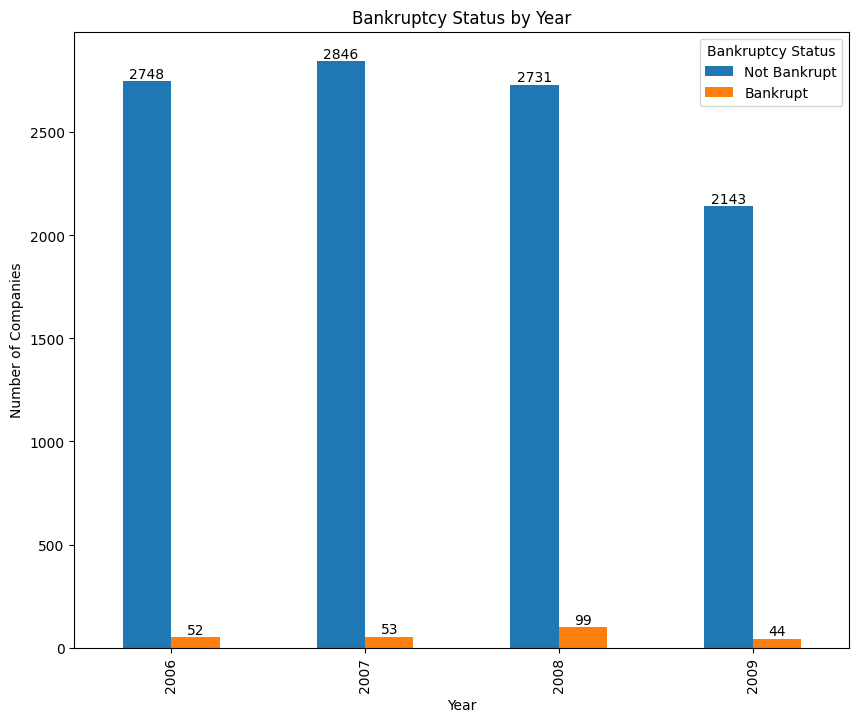

In [3]:
# Group data by year and bankruptcy status
yearly_counts = df.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().unstack(fill_value=0)

# Plot the data
ax = yearly_counts.plot(kind='bar', stacked=False, figsize=(10, 8))

# Set plot title and labels
plt.title('Bankruptcy Status by Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
legend_labels = ['Not Bankrupt', 'Bankrupt']
ax.legend(legend_labels, title='Bankruptcy Status', loc='upper right')

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

# Show plot
plt.show()

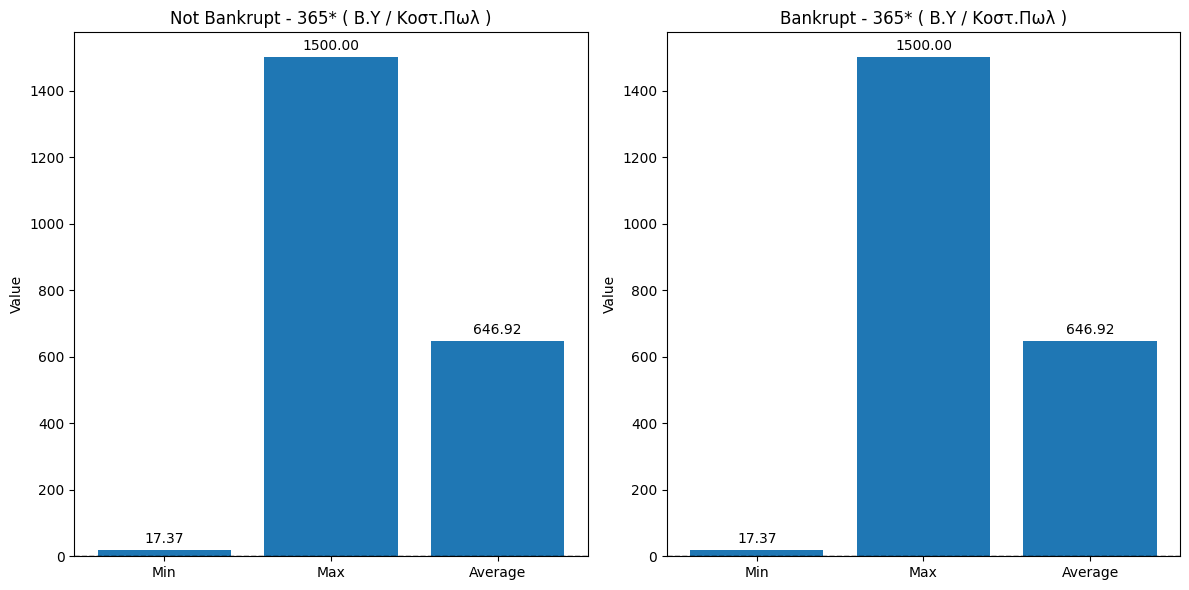

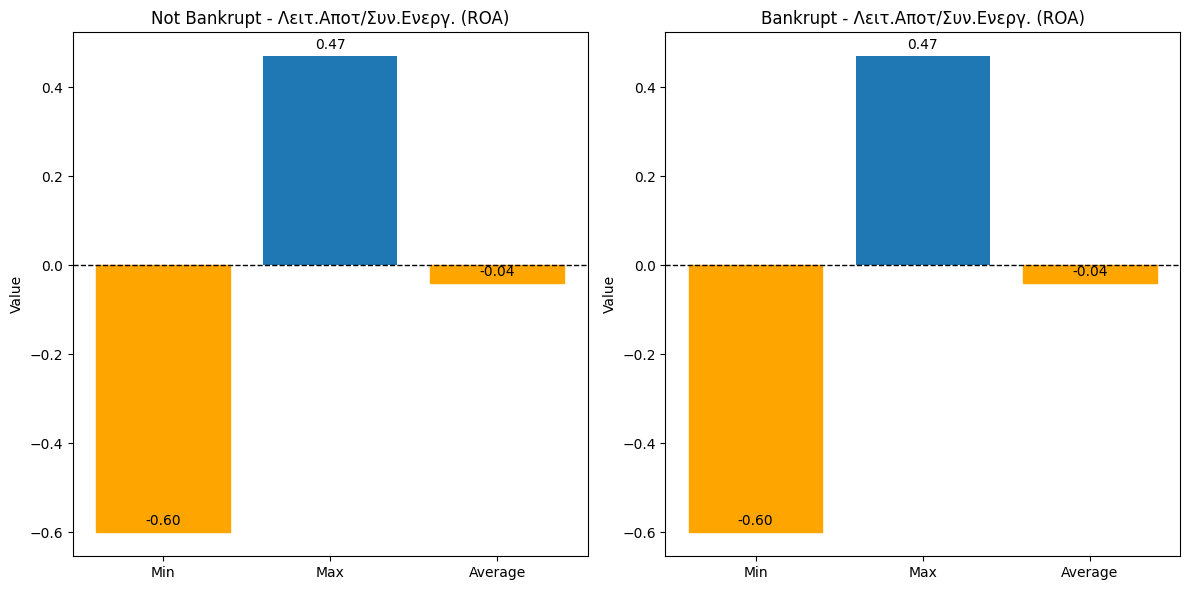

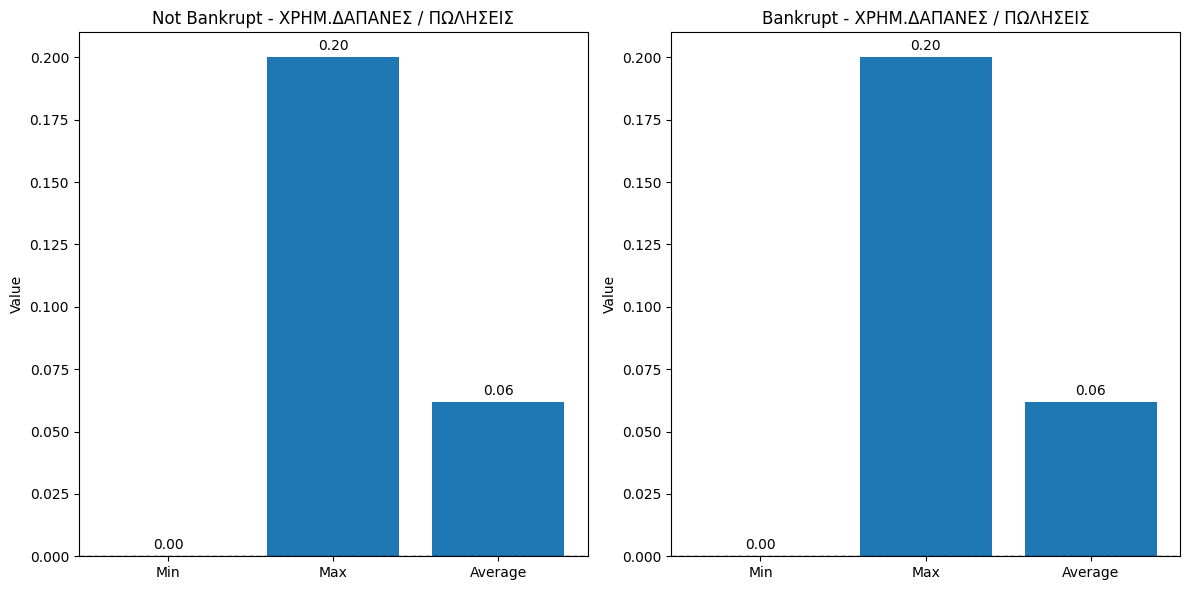

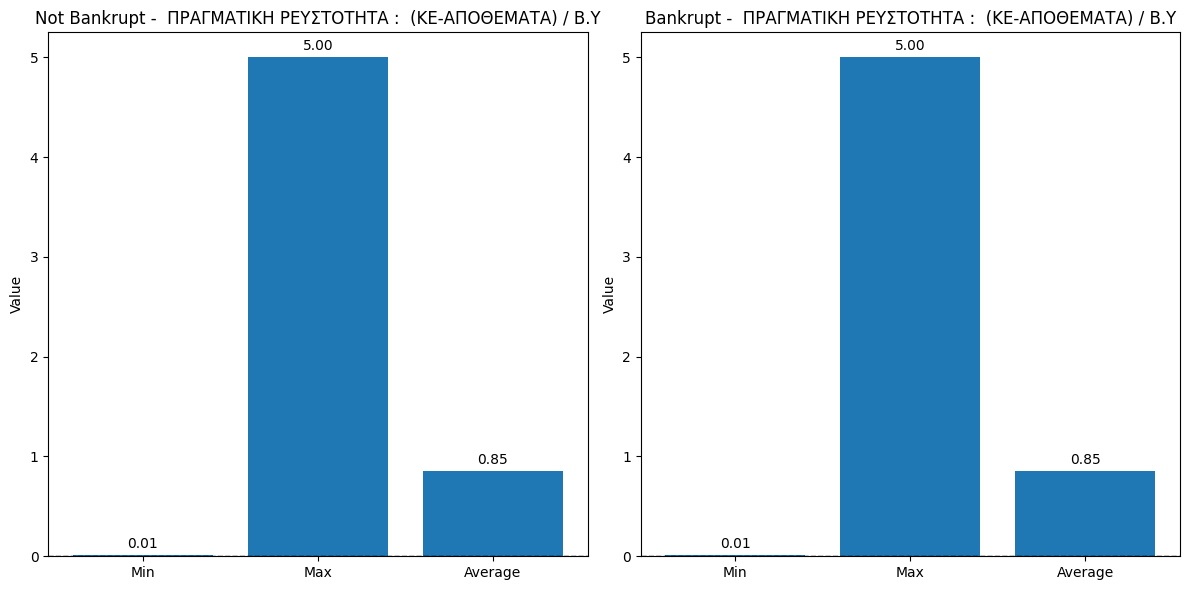

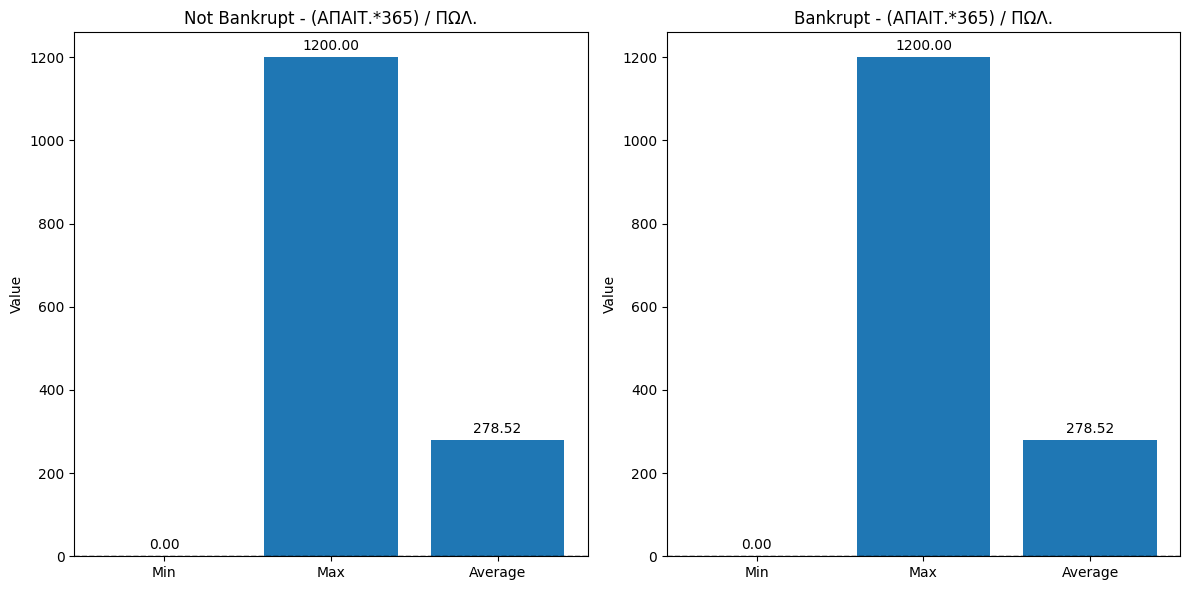

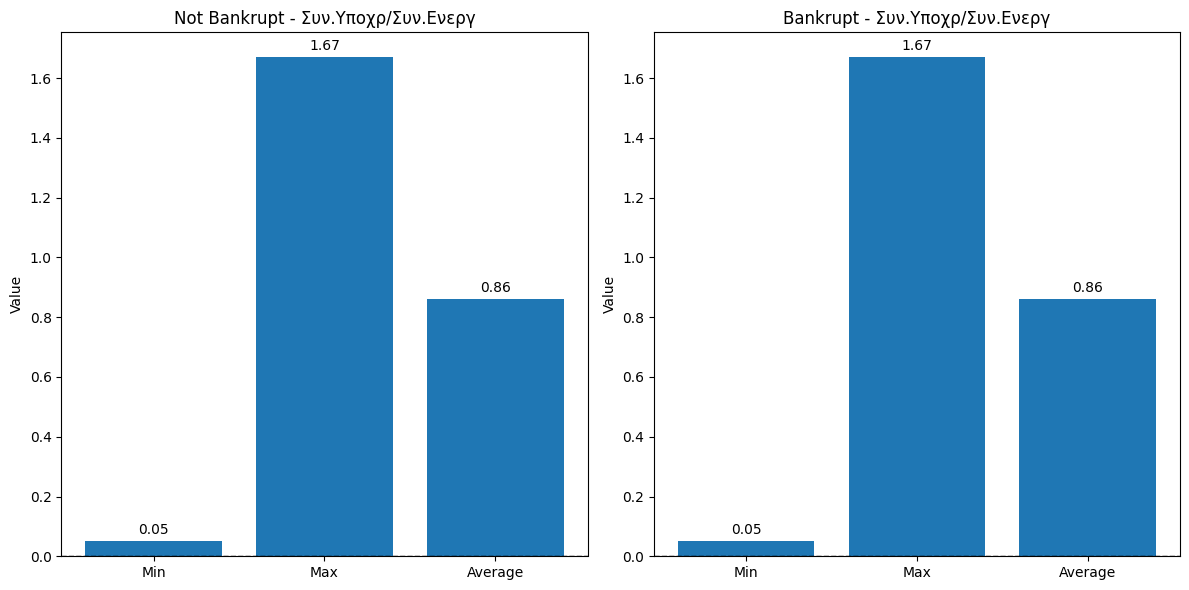

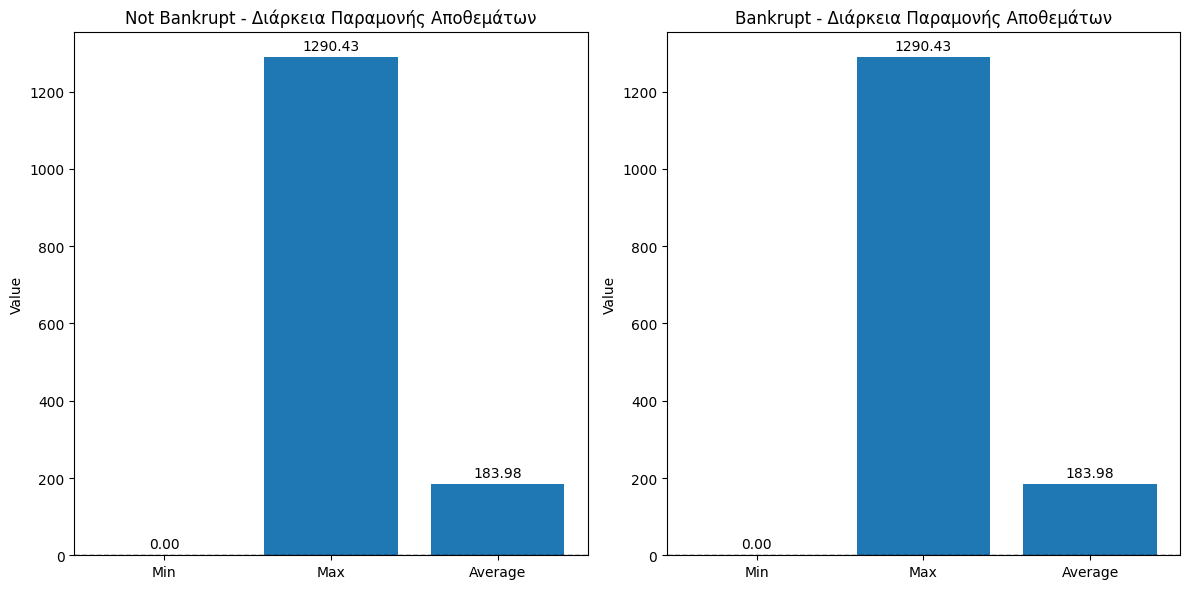

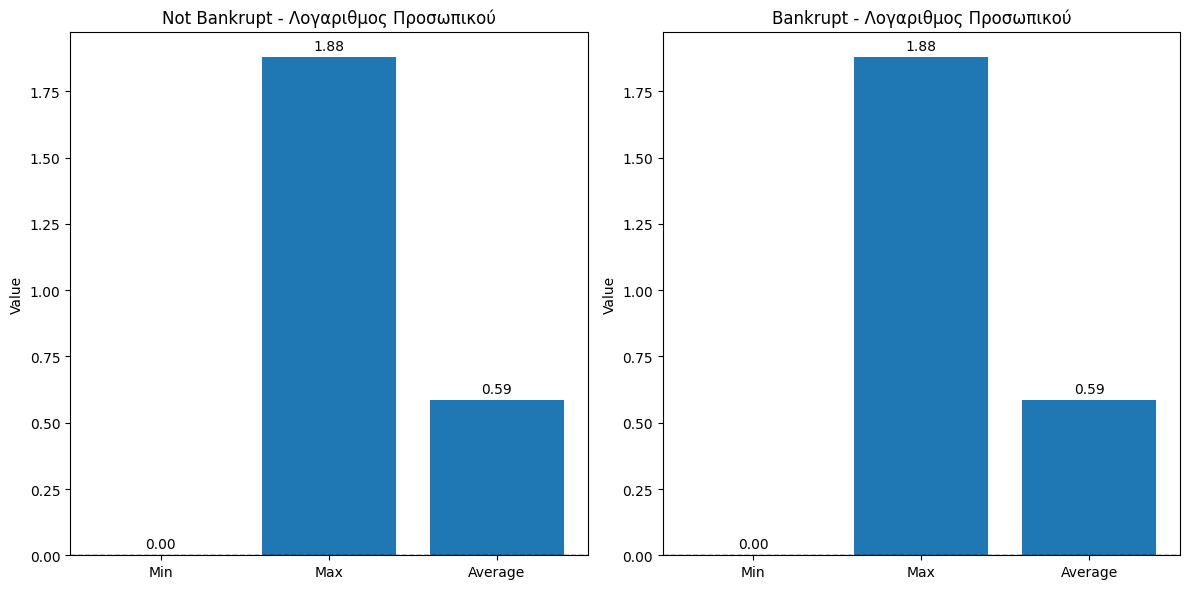

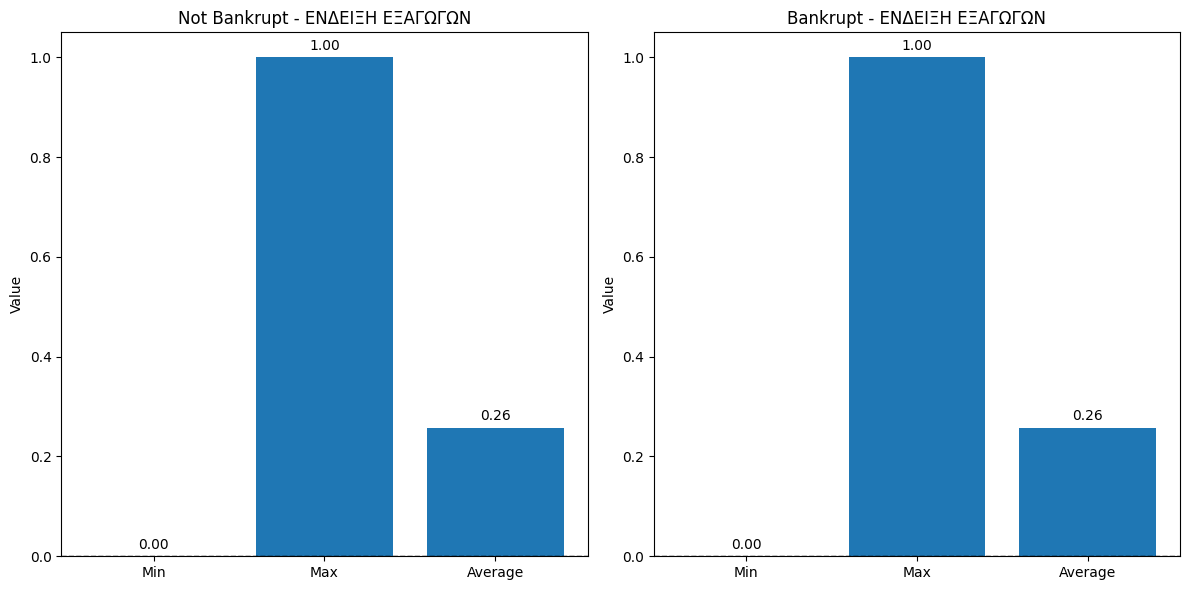

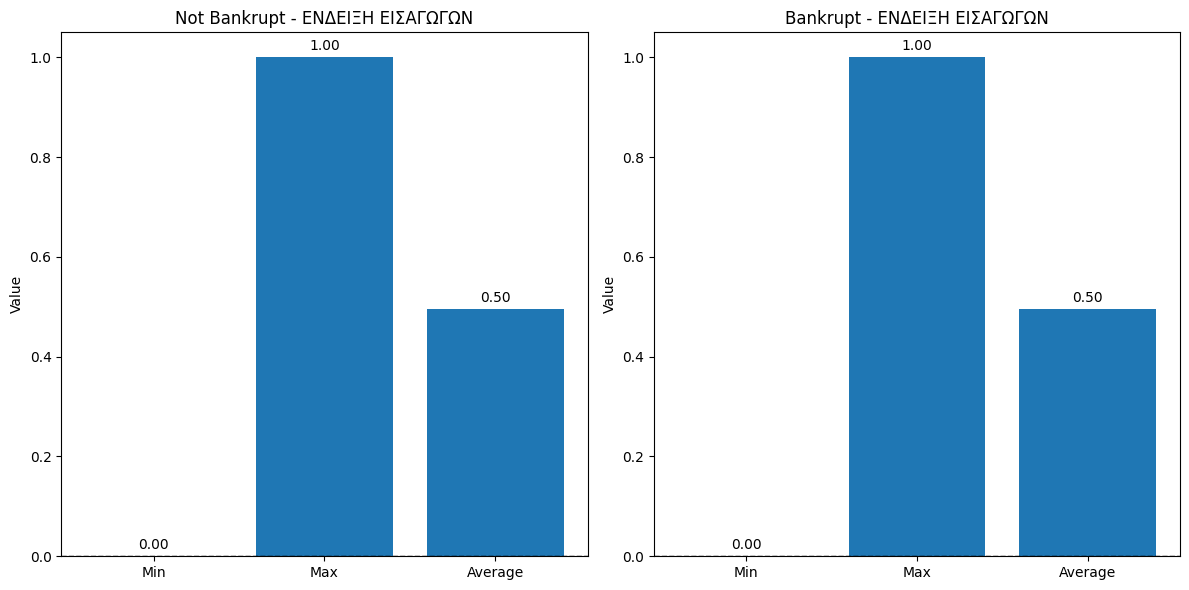

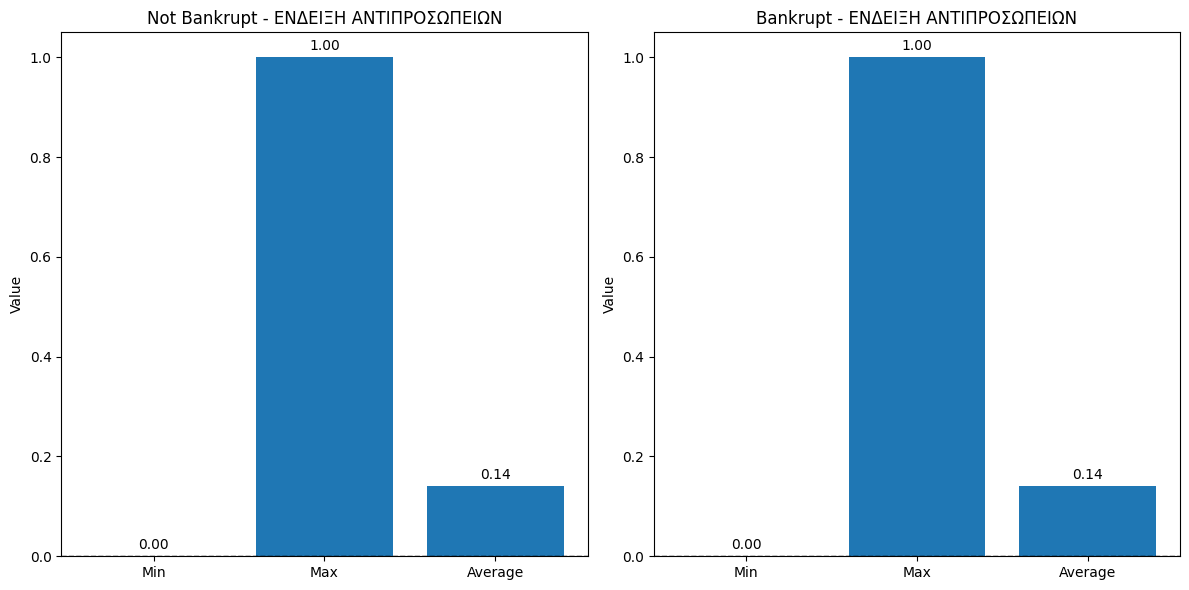

In [4]:
import matplotlib.pyplot as plt

# Group data by company indices and bankruptcy status
grouped = df.groupby(['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'])
indices = df.columns[:-2]

# Create subplots for each index
for index in indices:
    # Calculate min, max, and average for not bankrupt companies
    not_bankrupt_data = grouped.get_group(1)[index]
    not_bankrupt_min = not_bankrupt_data.min()
    not_bankrupt_max = not_bankrupt_data.max()
    not_bankrupt_avg = not_bankrupt_data.mean()

    # Calculate min, max, and average for bankrupt companies
    bankrupt_data = grouped.get_group(1)[index]
    bankrupt_min = bankrupt_data.min()
    bankrupt_max = bankrupt_data.max()
    bankrupt_avg = bankrupt_data.mean()

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for not bankrupt companies
    not_bankrupt_bars = axes[0].bar(['Min', 'Max', 'Average'], [not_bankrupt_min, not_bankrupt_max, not_bankrupt_avg])
    axes[0].set_title(f'Not Bankrupt - {index}')
    axes[0].set_ylabel('Value')
    axes[0].axhline(0, color='black', linestyle='--', linewidth=1)

    # Set color for negative values to orange
    for bar in not_bankrupt_bars:
        if bar.get_height() < 0:
            bar.set_color('orange')

    # Add actual values on top of each bar
    for bar, val in zip(not_bankrupt_bars, [not_bankrupt_min, not_bankrupt_max, not_bankrupt_avg]):
        axes[0].annotate('%.2f' % val,
                         xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

    # Plot for bankrupt companies
    bankrupt_bars = axes[1].bar(['Min', 'Max', 'Average'], [bankrupt_min, bankrupt_max, bankrupt_avg])
    axes[1].set_title(f'Bankrupt - {index}')
    axes[1].set_ylabel('Value')
    axes[1].axhline(0, color='black', linestyle='--', linewidth=1)

    # Set color for negative values to orange
    for bar in bankrupt_bars:
        if bar.get_height() < 0:
            bar.set_color('orange')

    # Add actual values on top of each bar
    for bar, val in zip(bankrupt_bars, [bankrupt_min, bankrupt_max, bankrupt_avg]):
        axes[1].annotate('%.2f' % val,
                         xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

    plt.tight_layout()

    # Show plot
    plt.show()

## Check for missing values in Dataset

In [5]:
# Check for any missing entries
if df.isna().any().any():
    print("There are missing entries in the DataFrame.")


    # Display columns with missing values if the user desires
    show_missing_columns = input("Do you want to see the columns with missing values? (Yes/No): ")
    if show_missing_columns.lower() == "yes":
        missing_columns = df.columns[df.isna().any()]
        print("Columns with missing values:")
        print(missing_columns)

    # Remove NaN values
    df = df.dropna()
else:
    print("There are no missing entries in the DataFrame.")

There are no missing entries in the DataFrame.


## Normalize values

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalize
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-2]), columns=df.columns[:-2])

# Print Normalized Data
print("Normalized Data:")
print(df_normalized.head())

Normalized Data:
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                 0.089302                    0.667889   
1                 0.295689                    0.547009   
2                 0.043757                    0.657348   
3                 0.230982                    0.721588   
4                 0.392374                    0.546713   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.012985                                        0.211818   
1                 0.468635                                        0.180601   
2                 0.070798                                        0.437355   
3                 0.153901                                        0.155297   
4                 0.297336                                        0.073530   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0             0.072332             0.622817                       0.000000   
1        

In [7]:
target_column = 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'
feature_columns = df_normalized.select_dtypes(include=['float64', 'int64']).columns

df_normalized[target_column] = df[target_column]

X = df_normalized[feature_columns]
y = df_normalized[target_column]

In [8]:
df_normalized

365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                     0.089302                    0.667889   
1                     0.295689                    0.547009   
2                     0.043757                    0.657348   
3                     0.230982                    0.721588   
4                     0.392374                    0.546713   
...                        ...                         ...   
10711                 0.027940                    0.536940   
10712                 0.686943                    0.552027   
10713                 0.150687                    0.576614   
10714                 0.062735                    0.852602   
10715                 0.507167                    0.654092   

       ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  \
0                     0.012985   
1                     0.468635   
2                     0.070798   
3                     0.153901   
4                     0.297336   
...                        ...   
10711                 0.000839   
10712                 0.327356   
10713                 0.000915   
10714                 0.035645   
10715                 0.003006   

        ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  (ΑΠΑΙΤ.*365) / ΠΩΛ.  \
0                                            0.211818             0.072332   
1                                            0.180601             0.224272   
2                                            0.437355             0.086008   
3                                            0.155297             0.107828   
4                                            0.073530             0.092645   
...                                               ...                  ...   
10711                                        1.000000             0.141520   
10712                                        0.156669             0.351248   
10713                                        0.057095             0.041284   
10714                                        0.318791             0.087980   
10715                                        0.222751             0.000000   

       Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0                 0.622817                       0.000000   
1                 0.468151                       0.123551   
2                 0.400526                       0.020919   
3                 0.566341                       0.032109   
4                 0.516689                       0.110993   
...                    ...                            ...   
10711             0.049468                       0.103088   
10712             0.571350                       0.170934   
10713             1.000000                       0.018302   
10714             1.000000                       0.000000   
10715             0.429773                       0.034787   

       Λογαριθμος Προσωπικού  ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ  ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ  \
0                   0.238562               0.0                1.0   
1                   0.355433               0.0                0.0   
2                   0.410972               0.0                0.0   
3                   0.451280               0.0                1.0   
4                   0.368330               1.0                1.0   
...                      ...               ...                ...   
10711               0.451280               0.0                1.0   
10712               0.355433               0.0                1.0   
10713               0.205486               0.0                0.0   
10714               0.000000               0.0                1.0   
10715               0.509009               1.0                1.0   

       ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  
0                         0.0                              0  
1                         0.0                              0  
2                         0.0                              0  
3                         1.0                              0  
4                         0.0          

In [9]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [10]:
# Initialize lists to store the results
train_bankrupt_counts = []
train_healthy_counts = []
test_bankrupt_counts = []
test_healthy_counts = []

# Iterate through the folds
for train_index, test_index in stratified_kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    train_bankrupt_count = (y_train_fold == 1).sum()
    train_healthy_count = (y_train_fold == 0).sum()

    # Calculate the number of bankrupt and non-bankrupt companies for the test set
    test_bankrupt_count = (y_test_fold == 1).sum()
    test_healthy_count = (y_test_fold == 0).sum()

    # Store the results
    train_bankrupt_counts.append(train_bankrupt_count)
    train_healthy_counts.append(train_healthy_count)
    test_bankrupt_counts.append(test_bankrupt_count)
    test_healthy_counts.append(test_healthy_count)

    # Print the results for the current fold
    print(f"Fold {len(train_bankrupt_counts)}:")
    print(f"Healthy companies - Train: {train_healthy_count}, Test: {test_healthy_count}")
    print(f"Bankrupt companies - Train: {train_bankrupt_count}, Test: {test_bankrupt_count}")
    print()

# Print the overall number of bankrupt and healthy companies across all folds
print("Overall results:")
print(f"Average number of healthy companies in train set: {sum(train_healthy_counts) / len(train_healthy_counts)}")
print(f"Average number of bankrupt companies in train set: {sum(train_bankrupt_counts) / len(train_bankrupt_counts)}")
print(f"Average number of healthy companies in test set: {sum(test_healthy_counts) / len(test_healthy_counts)}")
print(f"Average number of bankrupt companies in test set: {sum(test_bankrupt_counts) / len(test_bankrupt_counts)}")

Fold 1:
Healthy companies - Train: 7851, Test: 2617
Bankrupt companies - Train: 186, Test: 62

Fold 2:
Healthy companies - Train: 7851, Test: 2617
Bankrupt companies - Train: 186, Test: 62

Fold 3:
Healthy companies - Train: 7851, Test: 2617
Bankrupt companies - Train: 186, Test: 62

Fold 4:
Healthy companies - Train: 7851, Test: 2617
Bankrupt companies - Train: 186, Test: 62

Overall results:
Average number of healthy companies in train set: 7851.0
Average number of bankrupt companies in train set: 186.0
Average number of healthy companies in test set: 2617.0
Average number of bankrupt companies in test set: 62.0


## Prepare Models

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier

param_grids = {
    "Linear Discriminant Analysis": {},
    "Logistic Regression": {
        "clf__C": [0.1, 1, 10],
        "clf__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        "clf__class_weight": ['balanced', None]
    },
    "Decision Trees": {
        "clf__max_depth": [None, 10, 15, 20],
        "clf__min_samples_split": [2, 10, 20],
        "clf__criterion": ['gini', 'entropy'],
        "clf__min_samples_leaf": [1, 5, 10],
        "clf__min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        "clf__max_features": ['auto', 'sqrt', 'log2', None]
    },
    "Random Forests": {
        "clf__n_estimators": [100],
        "clf__max_depth": [None],
        "clf__criterion": ['gini'],
        "clf__min_samples_split": [2],
        "clf__min_samples_leaf": [1],
        "clf__max_features": ['sqrt']
    },
    "k-Nearest Neighbors": {
        "clf__n_neighbors": [3, 5, 7, 9],
        "clf__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "clf__leaf_size": [10, 20, 30, 40, 50],
        "clf__weights": ['uniform', 'distance']
    },
    "Naïve Bayes": {},  # No hyperparameters to tune for Naive Bayes
    "Support Vector Machines": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf"],
        "clf__gamma": ['scale', 'auto'],
        "clf__class_weight": ['balanced', None]
    },
    "Multi-Layer Perceptron": {
        "clf__hidden_layer_sizes": [(50,), (100,)],
        "clf__alpha": [0.0001, 0.001],
        "clf__activation": ['relu', 'tanh'],
        "clf__solver": ['adam', 'sgd'],
        "clf__learning_rate": ['constant', 'adaptive']
    }
}

# Define models with pipelines and GridSearchCV for hyperparameter tuning
models = {
    "Linear Discriminant Analysis": GridSearchCV(
        Pipeline([('clf', LinearDiscriminantAnalysis())]),
        param_grids["Linear Discriminant Analysis"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "Logistic Regression": GridSearchCV(
        Pipeline([('clf', LogisticRegression())]),
        param_grids["Logistic Regression"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "Decision Trees": GridSearchCV(
        Pipeline([('clf', DecisionTreeClassifier())]),
        param_grids["Decision Trees"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "Random Forests": GridSearchCV(
        Pipeline([('clf', RandomForestClassifier())]),
        param_grids["Random Forests"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "k-Nearest Neighbors": GridSearchCV(
        Pipeline([('clf', KNeighborsClassifier())]),
        param_grids["k-Nearest Neighbors"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "Naïve Bayes": GridSearchCV(
        Pipeline([('clf', GaussianNB())]),
        param_grids["Naïve Bayes"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "Support Vector Machines": GridSearchCV(
        Pipeline([('clf', SVC(probability=True))]),
        param_grids["Support Vector Machines"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    ),
    "Multi-Layer Perceptron": GridSearchCV(
        Pipeline([('clf', MLPClassifier())]),
        param_grids["Multi-Layer Perceptron"],
        cv=stratified_kfold, scoring='recall', n_jobs=-1
    )
}

## Functions to calculate metrics and save results to Dataframe

In [12]:
def calculate_metrics(predictions, true_labels):
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    TP = np.sum((predictions == 1) & (true_labels == 1))
    TN = np.sum((predictions == 0) & (true_labels == 0))
    FP = np.sum((predictions == 1) & (true_labels == 0))
    FN = np.sum((predictions == 0) & (true_labels == 1))
    metrics = (TP, TN, FP, FN)
    return metrics

def add_results(results_df, name, fold, X_train, y_train, X_test, y_test, metrics_train, metrics_test):

    # Determine if the train set is balanced or unbalanced
    train_set_balance = "Balanced" if y_train.value_counts().min() / y_train.value_counts().max() > 0.33 else "Unbalanced"

    results_df.append({
        'Classifier Name': name,
        'Fold:': fold,
        'Training or Test Set': 'Train',
        'Balanced or Unbalanced Train Set': train_set_balance,
        'Number of Training Samples': len(X_train),
        'Number of Non-healthy Companies in Training Sample': (y_train == 1).sum(),
        'True Positives (TP)': metrics_train[0],
        'True Negatives (TN)': metrics_train[1],
        'False Positives (FP)': metrics_train[2],
        'False Negatives (FN)': metrics_train[3]
    })

    results_df.append({
        'Classifier Name': name,
        'Fold:': fold,
        'Training or Test Set': 'Test',
        'Balanced or Unbalanced Train Set': train_set_balance,
        'Number of Training Samples': len(X_test),
        'Number of Non-healthy Companies in Training Sample': (y_test == 1).sum(),
        'True Positives (TP)': metrics_test[0],
        'True Negatives (TN)': metrics_test[1],
        'False Positives (FP)': metrics_test[2],
        'False Negatives (FN)': metrics_test[3]
    })

    return results_df

## Functions to Monitor Models' Perfomance

In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, dataset_type, fold):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Not Bankrupt', 'Bankrupt'],
                yticklabels=['Not Bankrupt', 'Bankrupt'])
    plt.title(f'Confusion Matrix - {model_name} - {dataset_type} Set - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to check if model meets criteria
def check_model_criteria(all_test_metrics):
    avg_recall = np.mean([metrics[0] / (metrics[0] + metrics[3]) if (metrics[0] + metrics[3]) > 0 else 0 for metrics in all_test_metrics])
    avg_specificity = np.mean([metrics[1] / (metrics[1] + metrics[2]) if (metrics[1] + metrics[2]) > 0 else 0 for metrics in all_test_metrics])
    return avg_recall, avg_specificity

# Function to evaluate a single fold
def evaluate_fold(model, X_train_fold, y_train_fold, X_test_fold, y_test_fold, fold, model_name):
    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Predictions on train set
    train_predictions = model.predict(X_train_fold)
    train_confusion_matrix = confusion_matrix(y_train_fold, train_predictions)
    plot_confusion_matrix(train_confusion_matrix, model_name, "Train", fold)

    # Predictions on test set
    test_predictions = model.predict(X_test_fold)
    test_confusion_matrix = confusion_matrix(y_test_fold, test_predictions)
    plot_confusion_matrix(test_confusion_matrix, model_name, "Test", fold)

    # Metrics calculation for train set
    f1_train = f1_score(y_train_fold, train_predictions, pos_label=1)
    auc_train = roc_auc_score(y_train_fold, train_predictions)
    metrics_train = calculate_metrics(train_predictions, y_train_fold)

    # Metrics calculation for test set
    f1_test = f1_score(y_test_fold, test_predictions, pos_label=1)
    auc_test = roc_auc_score(y_test_fold, test_predictions)
    metrics_test = calculate_metrics(test_predictions, y_test_fold)

    return f1_train, auc_train, metrics_train, f1_test, auc_test, metrics_test

# Function to evaluate a single model
def evaluate_model(name, model, X, y, stratified_kfold):
    results = []
    f1_scores_train = []
    auc_rocs_train = []
    f1_scores_test = []
    auc_rocs_test = []
    all_train_metrics = []
    all_test_metrics = []

    for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        f1_train, auc_train, metrics_train, f1_test, auc_test, metrics_test = evaluate_fold(
            model, X_train_fold, y_train_fold, X_test_fold, y_test_fold, fold, name)

        f1_scores_train.append(f1_train)
        auc_rocs_train.append(auc_train)
        f1_scores_test.append(f1_test)
        auc_rocs_test.append(auc_test)
        all_train_metrics.append(metrics_train)
        all_test_metrics.append(metrics_test)

        results = add_results(results, name, fold, X_train_fold, y_train_fold, X_test_fold, y_test_fold, metrics_train, metrics_test)

    avg_recall_train, avg_specificity_train = check_model_criteria(all_train_metrics)
    avg_recall_test, avg_specificity_test = check_model_criteria(all_test_metrics)
    return results, f1_scores_train, auc_rocs_train, f1_scores_test, auc_rocs_test, avg_recall_train, avg_specificity_train, avg_recall_test, avg_specificity_test

## Models' Training and Evaluation

In [14]:
# Main function to orchestrate the process
def train_and_evaluate(models, X, y, stratified_kfold):
    all_results = []
    valid_models = []

    for name, model in models.items():
        results, f1_scores_train, auc_rocs_train, f1_scores_test, auc_rocs_test, avg_recall_train, avg_specificity_train, avg_recall_test, avg_specificity_test = evaluate_model(name, model, X, y, stratified_kfold)
        all_results.extend(results)

        if avg_recall_test >= 0.60 and avg_specificity_test >= 0.70:
            valid_models.append((model, name, avg_recall_test, avg_specificity_test))

        print(f"{name} - Train Set")
        print("-------------------")
        print("Average F1 Score:", round(sum(f1_scores_train) / len(f1_scores_train), 2))
        print("Average AUC ROC:", round(sum(auc_rocs_train) / len(auc_rocs_train), 2))
        print(f"Average Recall: {avg_recall_train} , Average Specifity: {avg_specificity_train}")
        print("\n")

        print(f"{name} - Test Set")
        print("-------------------")
        print("Average F1 Score:", round(sum(f1_scores_test) / len(f1_scores_test), 2))
        print("Average AUC ROC:", round(sum(auc_rocs_test) / len(auc_rocs_test), 2))
        print(f"Average Recall: {avg_recall_test} , Average Specifity: {avg_specificity_test}\n")
        print("\n")

    return all_results, valid_models

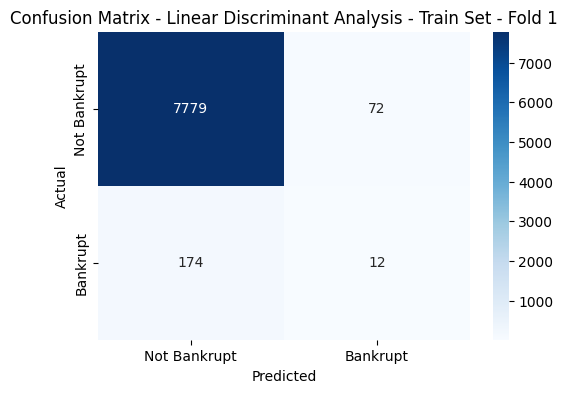

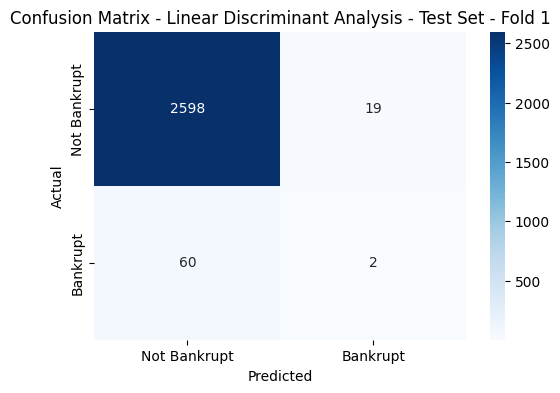

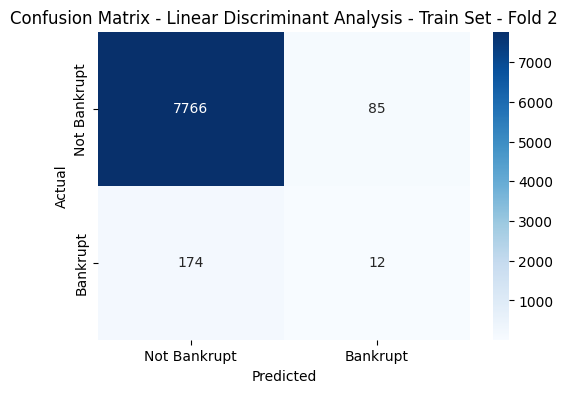

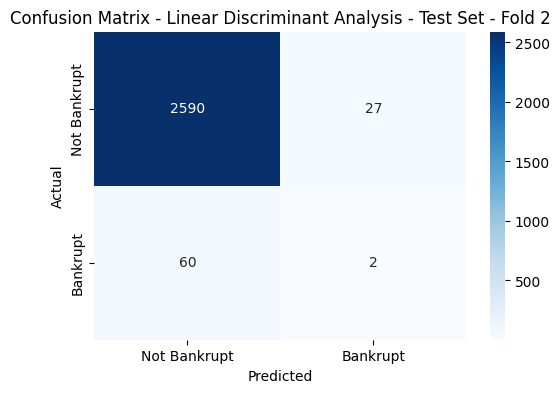

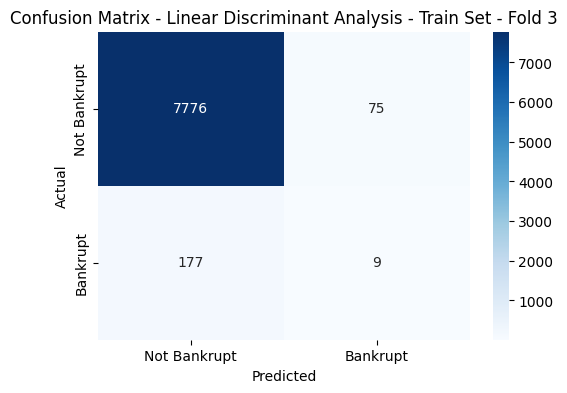

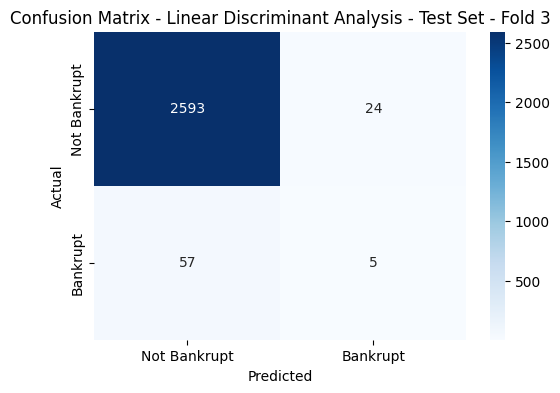

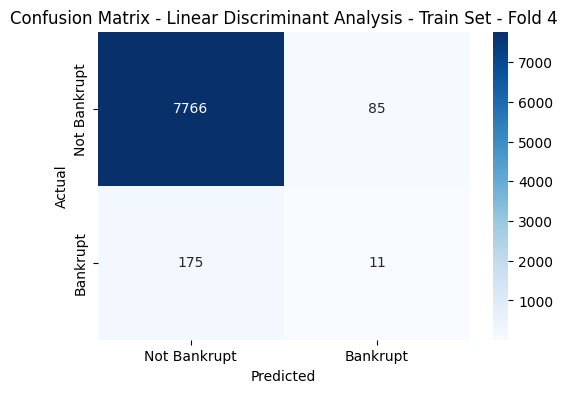

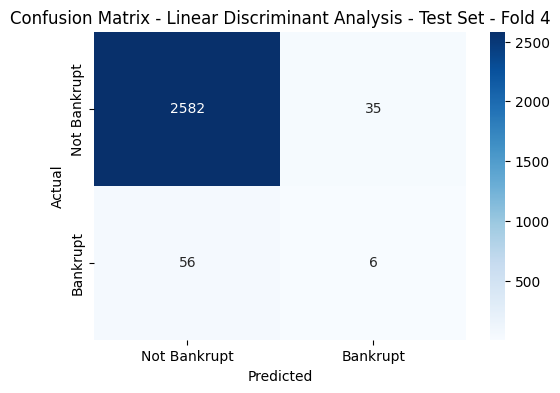

Linear Discriminant Analysis - Train Set
-------------------
Average F1 Score: 0.08
Average AUC ROC: 0.52
Average Recall: 0.05913978494623656 , Average Specifity: 0.9899057444911477


Linear Discriminant Analysis - Test Set
-------------------
Average F1 Score: 0.08
Average AUC ROC: 0.53
Average Recall: 0.06048387096774193 , Average Specifity: 0.9899694306457776





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


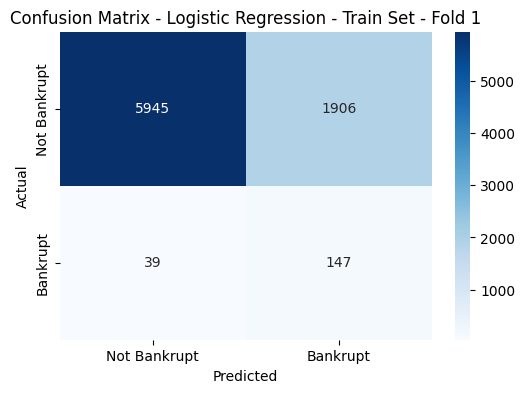

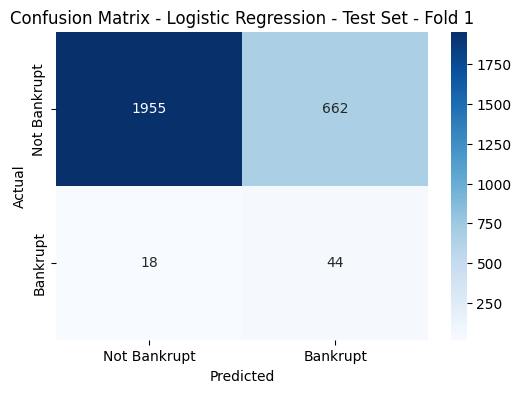

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


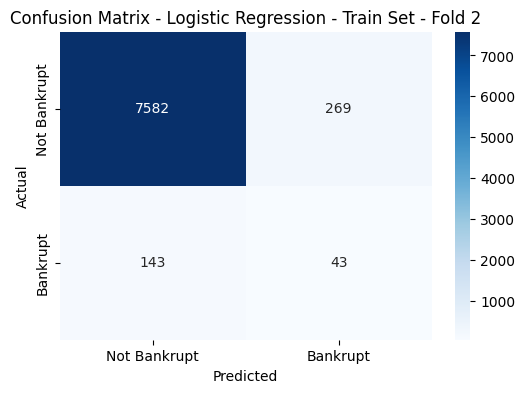

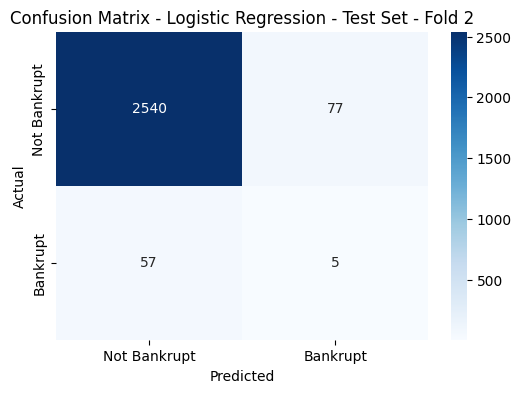

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


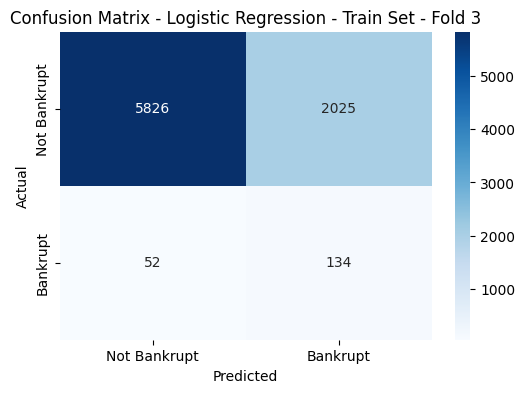

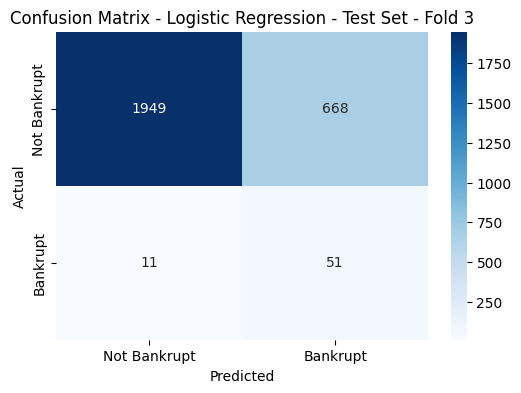

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


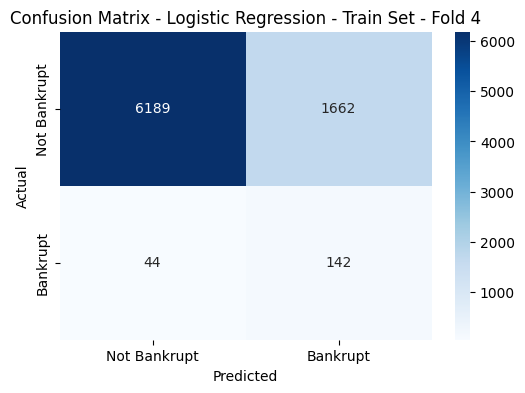

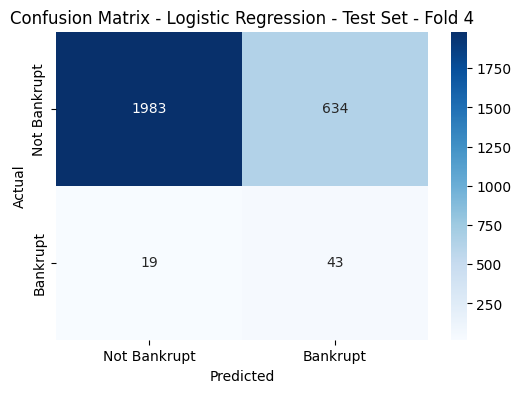

Logistic Regression - Train Set
-------------------
Average F1 Score: 0.14
Average AUC ROC: 0.72
Average Recall: 0.6263440860215054 , Average Specifity: 0.8133358807795185


Logistic Regression - Test Set
-------------------
Average F1 Score: 0.11
Average AUC ROC: 0.69
Average Recall: 0.5766129032258065 , Average Specifity: 0.8050248376003057





/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


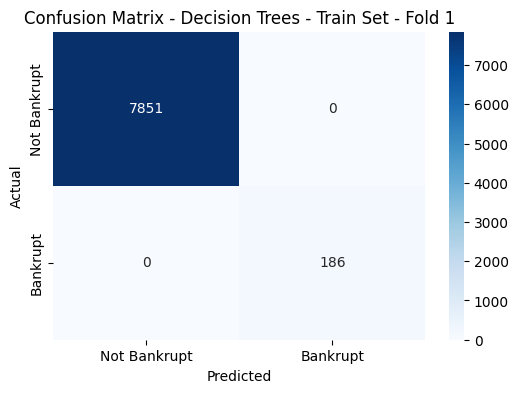

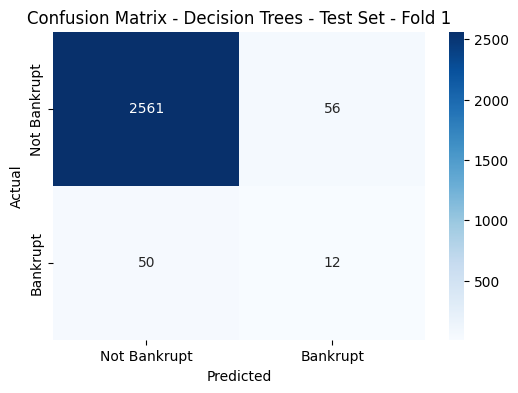

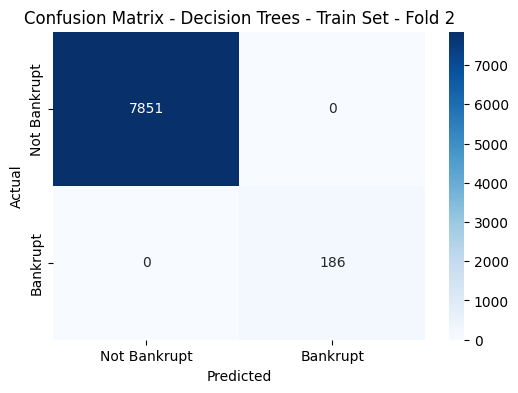

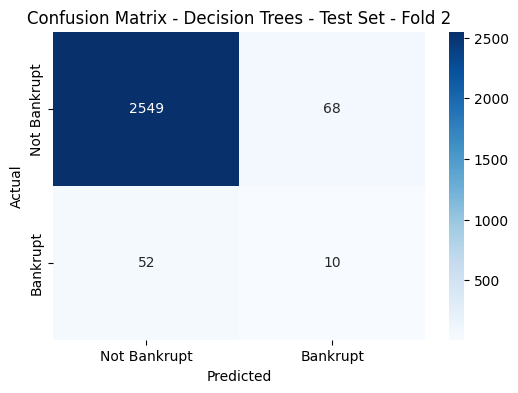

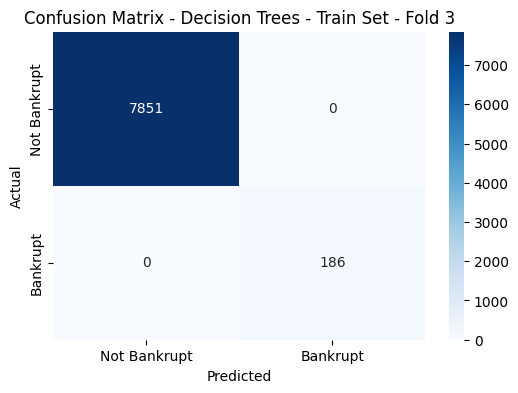

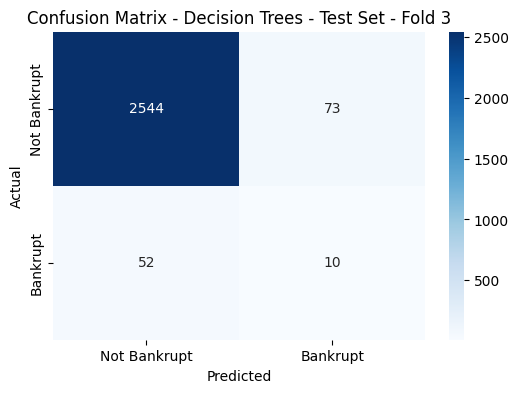

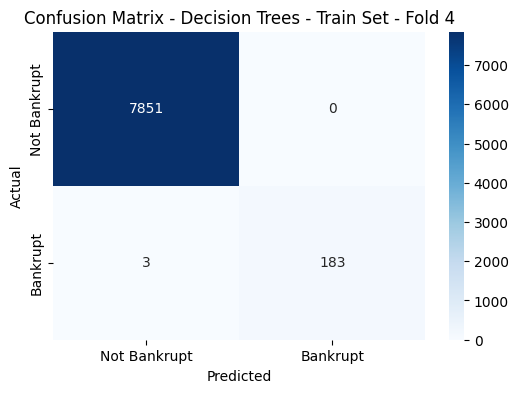

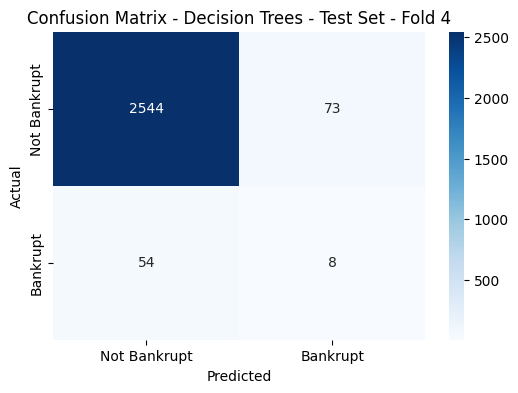

Decision Trees - Train Set
-------------------
Average F1 Score: 1.0
Average AUC ROC: 1.0
Average Recall: 0.9959677419354839 , Average Specifity: 1.0


Decision Trees - Test Set
-------------------
Average F1 Score: 0.14
Average AUC ROC: 0.57
Average Recall: 0.16129032258064516 , Average Specifity: 0.9742071073748566





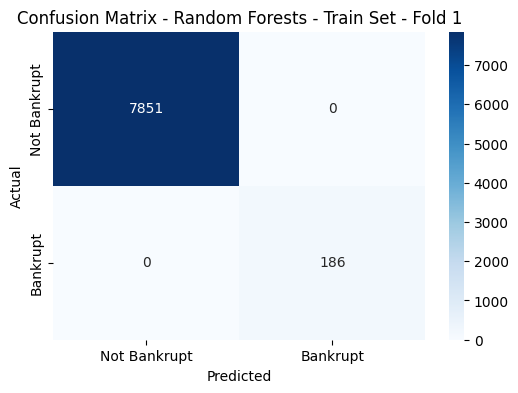

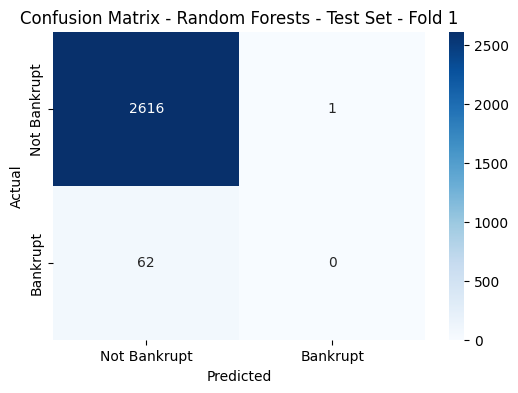

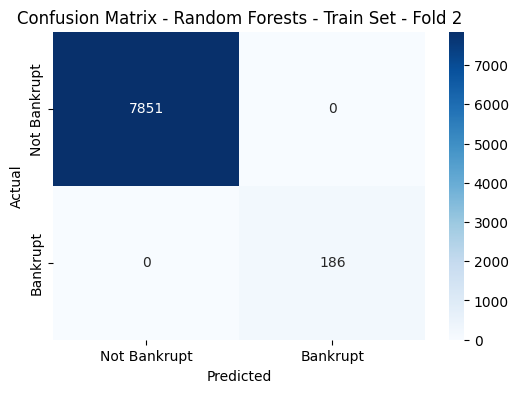

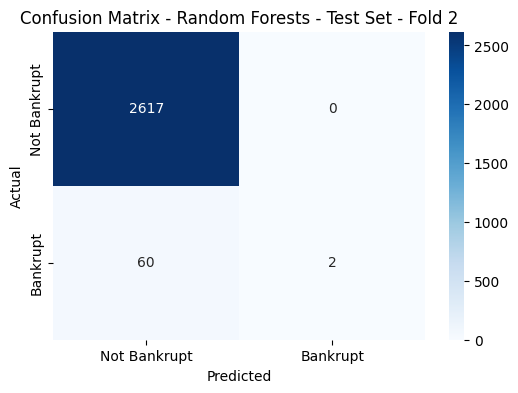

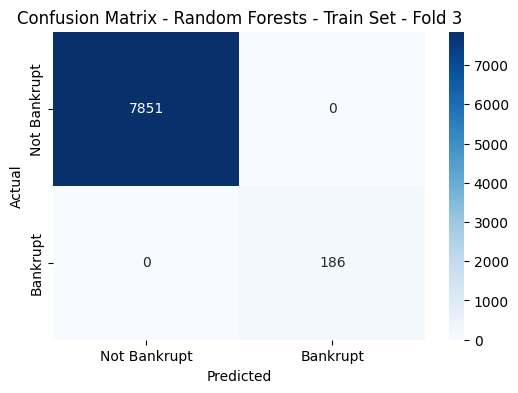

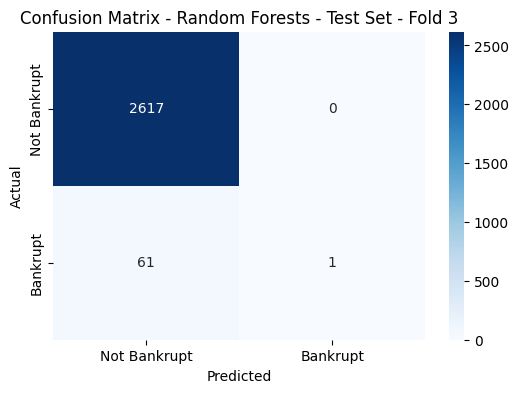

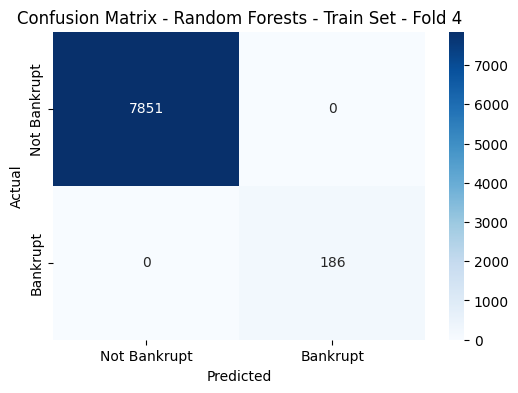

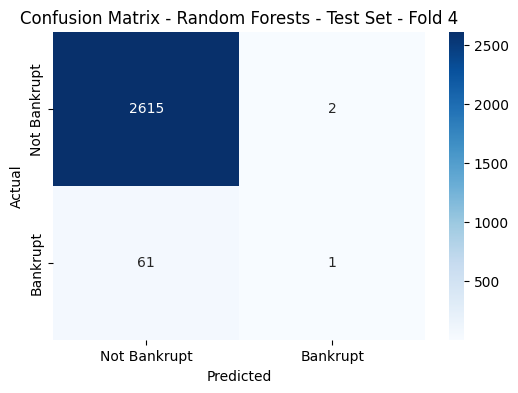

Random Forests - Train Set
-------------------
Average F1 Score: 1.0
Average AUC ROC: 1.0
Average Recall: 1.0 , Average Specifity: 1.0


Random Forests - Test Set
-------------------
Average F1 Score: 0.03
Average AUC ROC: 0.51
Average Recall: 0.016129032258064516 , Average Specifity: 0.9997134123041651





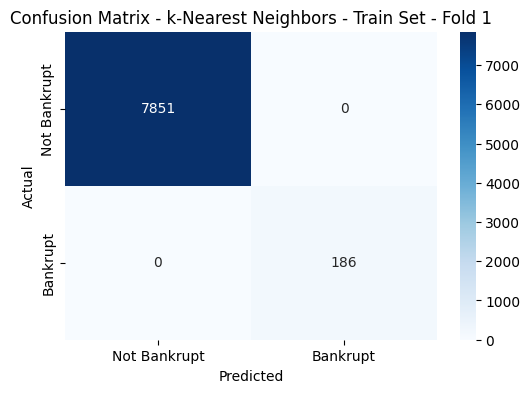

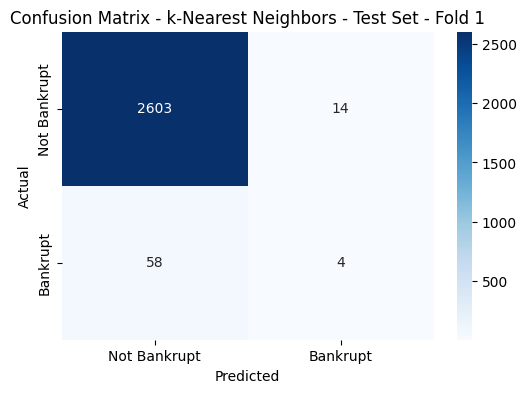

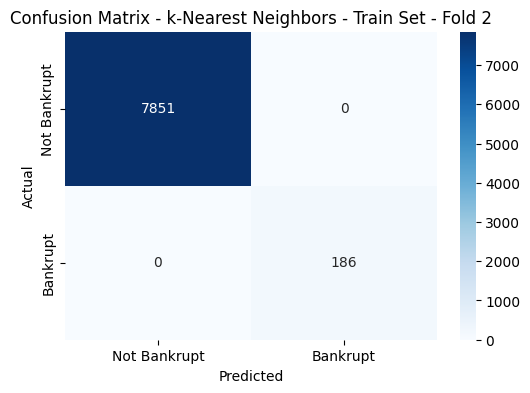

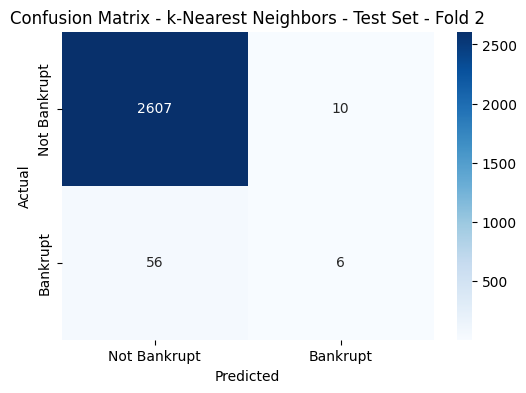

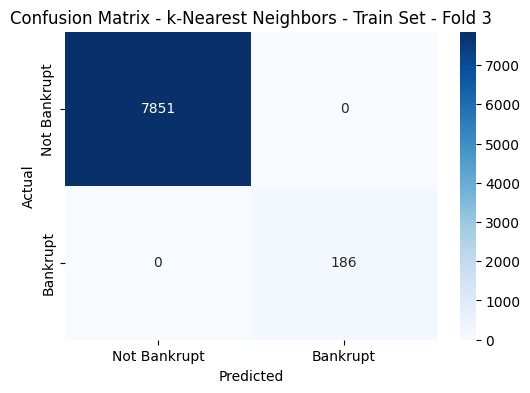

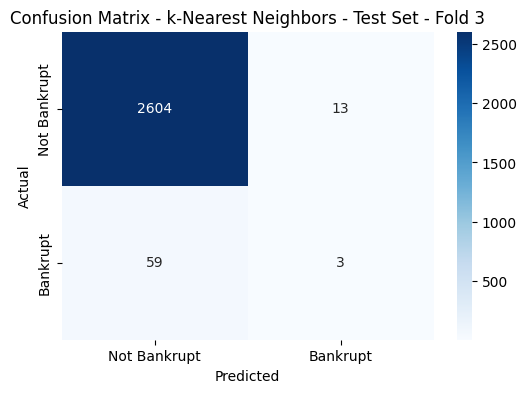

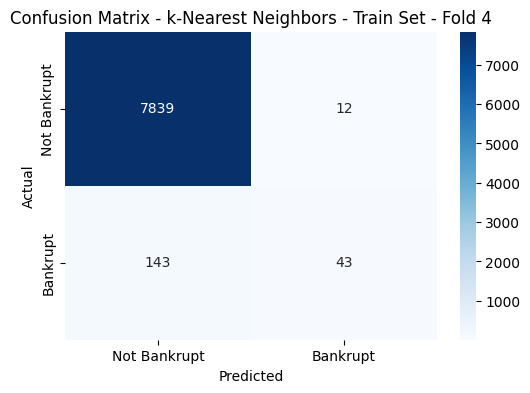

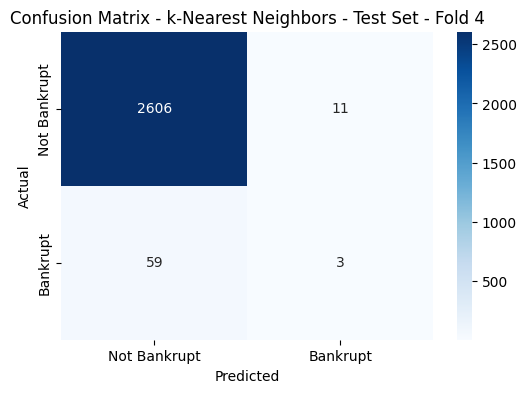

k-Nearest Neighbors - Train Set
-------------------
Average F1 Score: 0.84
Average AUC ROC: 0.9
Average Recall: 0.8077956989247311 , Average Specifity: 0.9996178830722201


k-Nearest Neighbors - Test Set
-------------------
Average F1 Score: 0.1
Average AUC ROC: 0.53
Average Recall: 0.06451612903225806 , Average Specifity: 0.9954145968666412





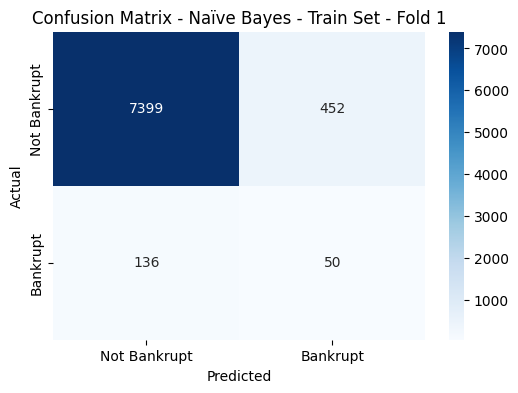

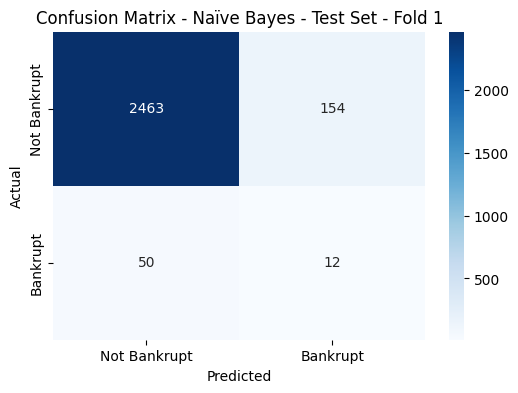

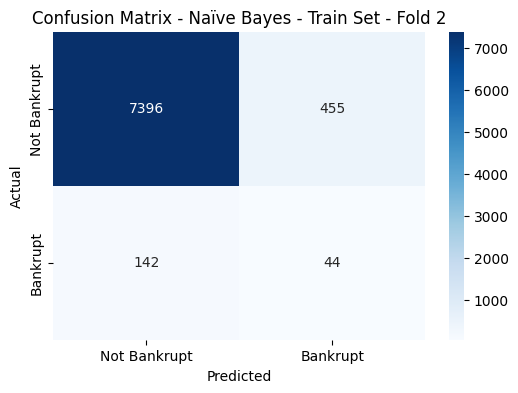

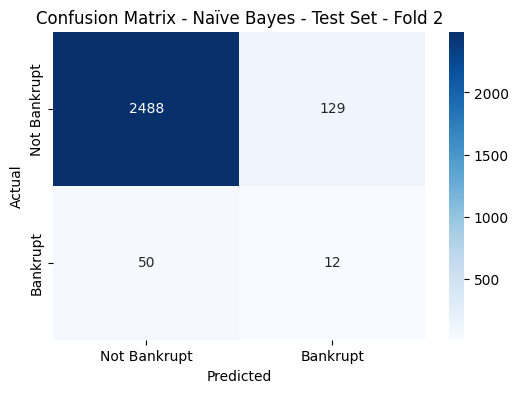

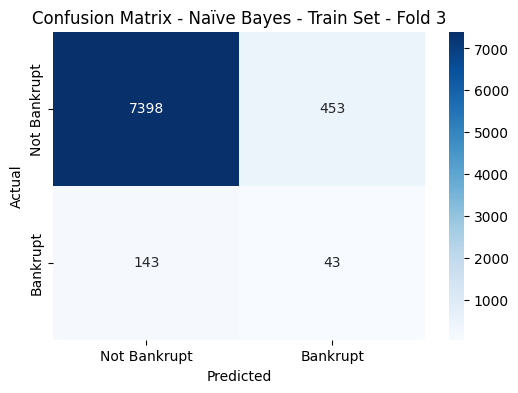

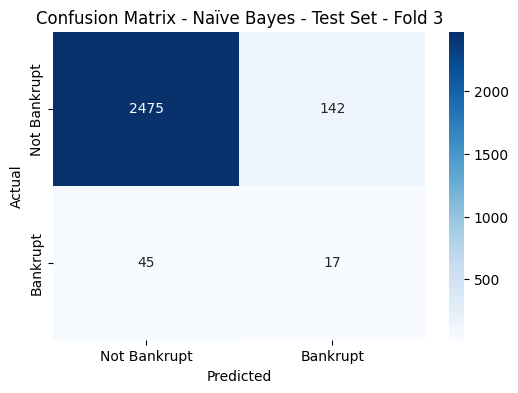

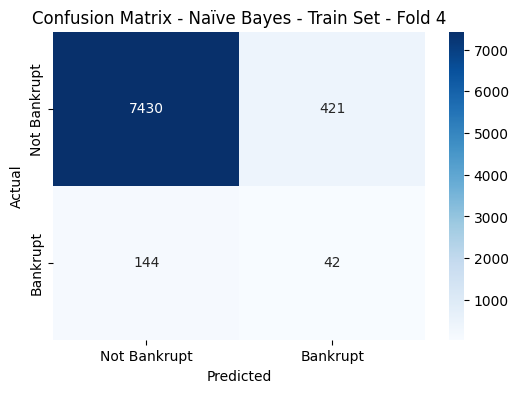

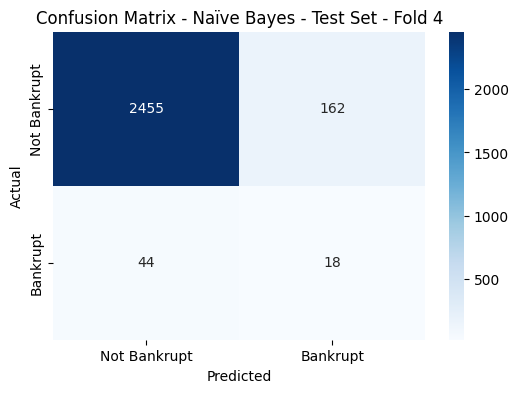

Naïve Bayes - Train Set
-------------------
Average F1 Score: 0.13
Average AUC ROC: 0.59
Average Recall: 0.24059139784946237 , Average Specifity: 0.9432874793019996


Naïve Bayes - Test Set
-------------------
Average F1 Score: 0.13
Average AUC ROC: 0.59
Average Recall: 0.23790322580645162 , Average Specifity: 0.9439243408482996





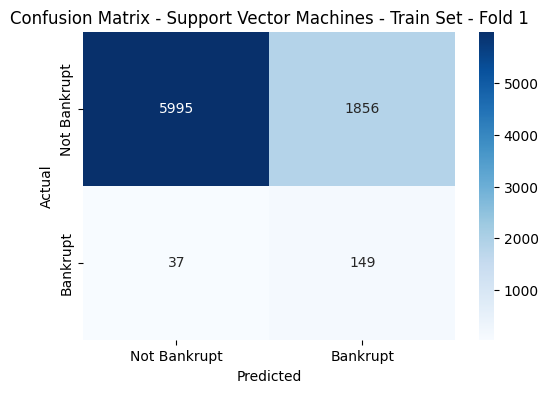

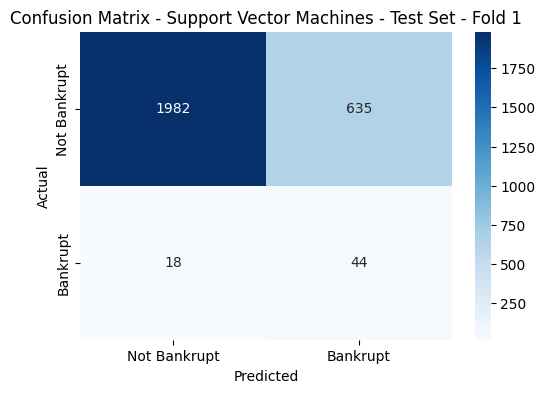

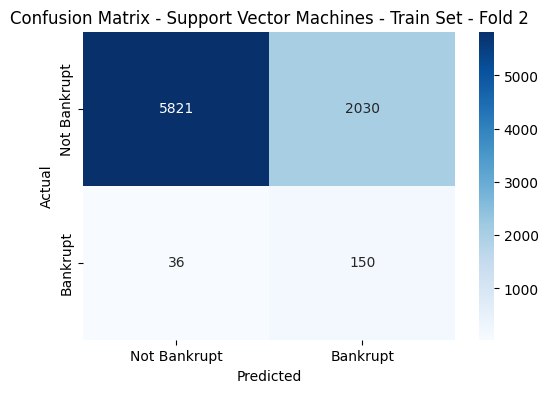

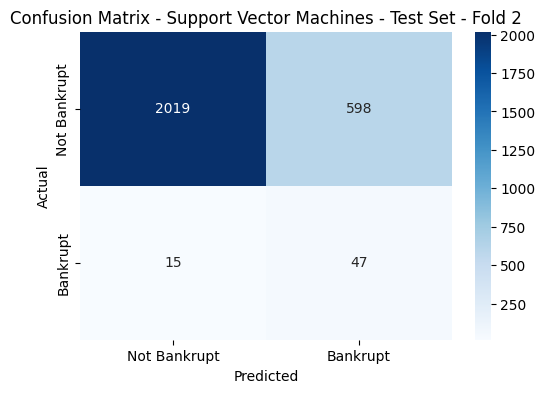

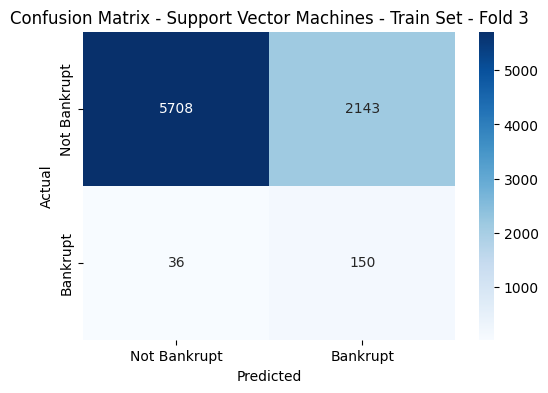

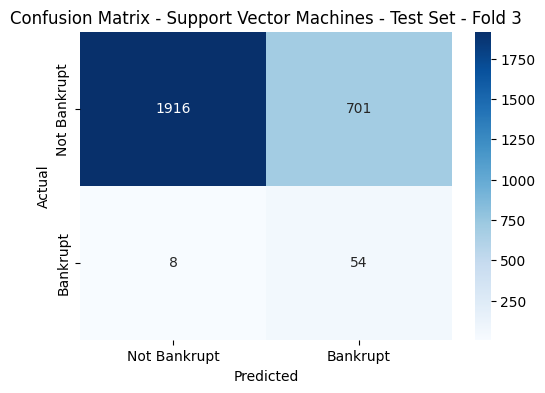

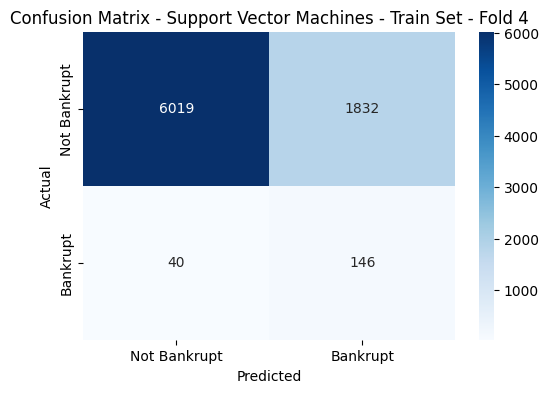

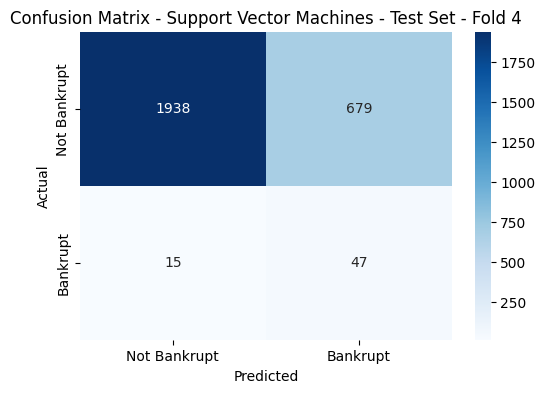

Support Vector Machines - Train Set
-------------------
Average F1 Score: 0.13
Average AUC ROC: 0.77
Average Recall: 0.799731182795699 , Average Specifity: 0.74968156922685


Support Vector Machines - Test Set
-------------------
Average F1 Score: 0.13
Average AUC ROC: 0.76
Average Recall: 0.7741935483870968 , Average Specifity: 0.7503821169277798





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


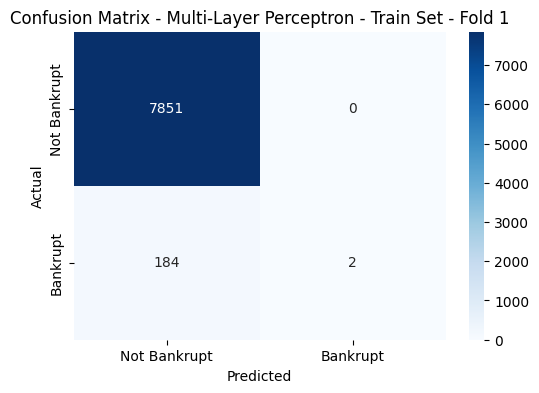

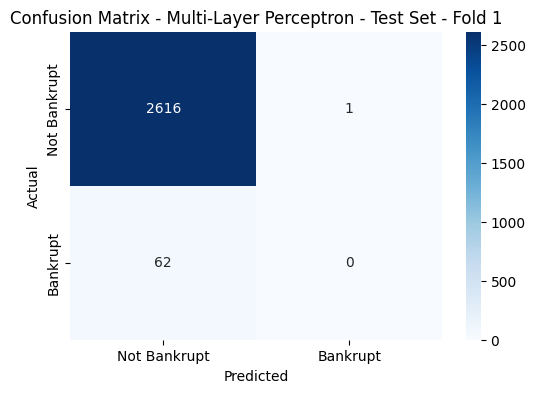

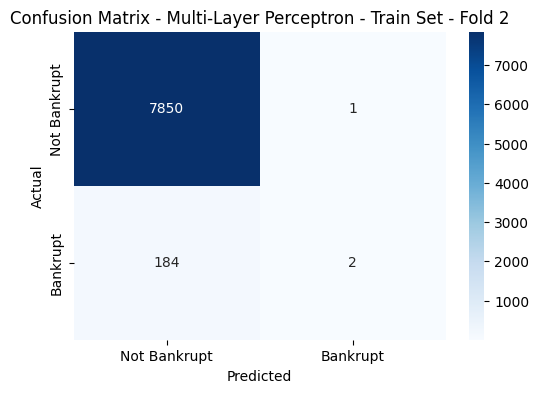

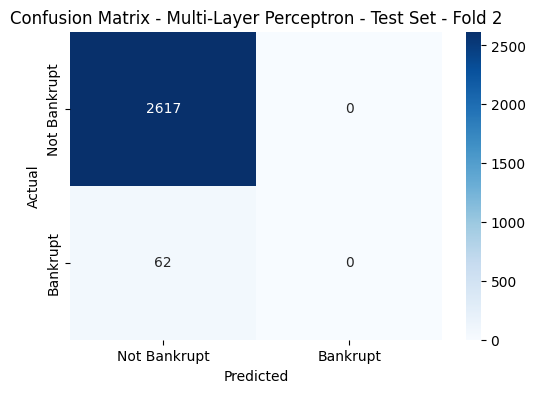

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


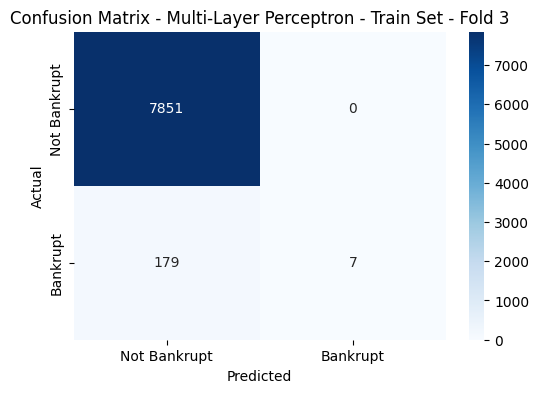

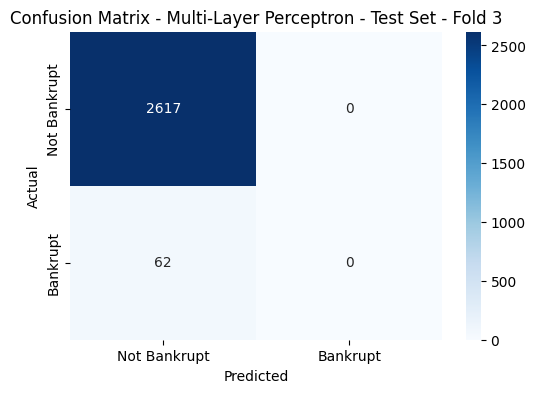

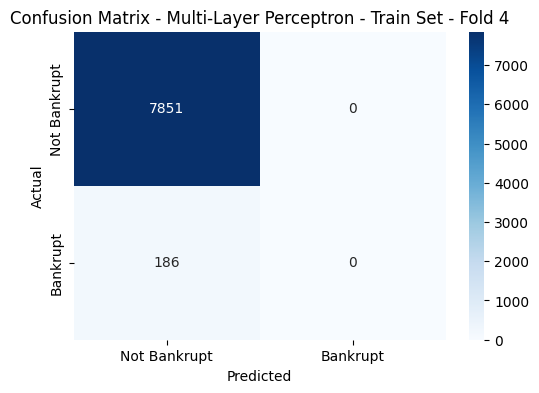

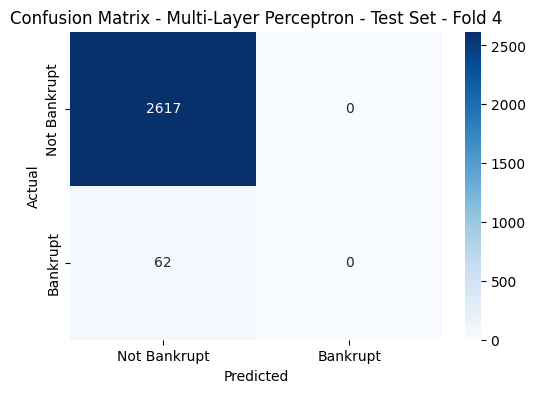

Multi-Layer Perceptron - Train Set
-------------------
Average F1 Score: 0.03
Average AUC ROC: 0.51
Average Recall: 0.01478494623655914 , Average Specifity: 0.999968156922685


Multi-Layer Perceptron - Test Set
-------------------
Average F1 Score: 0.0
Average AUC ROC: 0.5
Average Recall: 0.0 , Average Specifity: 0.999904470768055





In [15]:
results_imbalanced, valid_models_imbalanced = train_and_evaluate(models, X, y, stratified_kfold)

In [31]:
if valid_models_imbalanced:
  print("\nValid Models that meet the criteria:\n")
  for model in valid_models_imbalanced:
      print(f"Model: {model[1]}, Average Recall: {model[2]:.2f}, Average Specificity: {model[3]:.2f}")
      print(f"Best Parameters: {model[0].best_params_}\n")
else:
  print("There is no model meeting the requirements")


Valid Models that meet the criteria:

Model: Support Vector Machines, Average Recall: 0.77, Average Specificity: 0.75
Best Parameters: {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}



In [17]:
results_imbalanced_df = pd.DataFrame(results_imbalanced)
# Save DataFrame to a CSV file
results_imbalanced_df.to_csv('unbalancedDataOutcomes.csv', index=False)
print(results_imbalanced_df)

                 Classifier Name  Fold: Training or Test Set  \
0   Linear Discriminant Analysis      1                Train   
1   Linear Discriminant Analysis      1                 Test   
2   Linear Discriminant Analysis      2                Train   
3   Linear Discriminant Analysis      2                 Test   
4   Linear Discriminant Analysis      3                Train   
..                           ...    ...                  ...   
59        Multi-Layer Perceptron      2                 Test   
60        Multi-Layer Perceptron      3                Train   
61        Multi-Layer Perceptron      3                 Test   
62        Multi-Layer Perceptron      4                Train   
63        Multi-Layer Perceptron      4                 Test   

   Balanced or Unbalanced Train Set  Number of Training Samples  \
0                        Unbalanced                        8037   
1                        Unbalanced                        2679   
2                        Unbal

## Balance Dataset (3 Healthy Companies to 1 Unhealthy)

In [18]:
import random

# Separate healthy and bankrupt companies
healthy_companies = df_normalized[df_normalized[target_column] == 0]
bankrupt_companies = df_normalized[df_normalized[target_column] == 1]

# Randomly select healthy companies to keep
selected_healthy = random.sample(list(healthy_companies.index), k=len(bankrupt_companies)*3)

# Remove excess healthy companies
df_normalized_balanced = df_normalized.loc[selected_healthy + list(bankrupt_companies.index)]

# Shuffle the DataFrame to mix the remaining companies
df_normalized_balanced = df_normalized_balanced.sample(frac=1).reset_index(drop=True)

print("Number of healthy companies:", len(df_normalized_balanced[df_normalized_balanced[target_column] == 0]))
print("Number of bankrupt companies:", len(df_normalized_balanced[df_normalized_balanced[target_column] == 1]))

Number of healthy companies: 744
Number of bankrupt companies: 248


In [19]:
X = df_normalized_balanced[feature_columns]
y = df_normalized_balanced[target_column]
print(df_normalized_balanced)

     365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                   0.904862                    0.548019   
1                   1.000000                    0.554442   
2                   0.162240                    0.559982   
3                   0.060294                    0.629507   
4                   0.056938                    0.571386   
..                       ...                         ...   
987                 0.166822                    0.564745   
988                 0.141326                    0.619585   
989                 0.150687                    0.576614   
990                 0.405591                    0.567723   
991                 1.000000                    0.371266   

     ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                   0.401391                                        0.121686   
1                   0.103490                                        0.007763   
2                   0.156983           

## Train and Evaluate Balanced Dataset

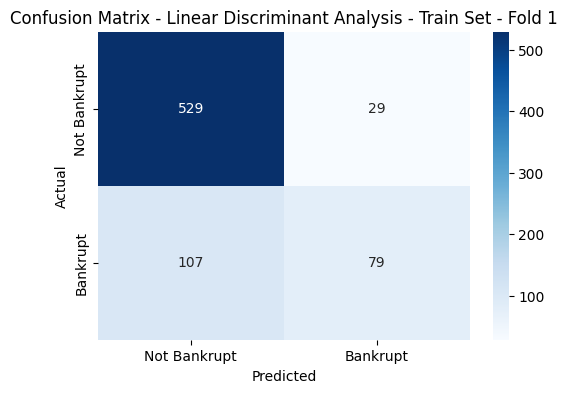

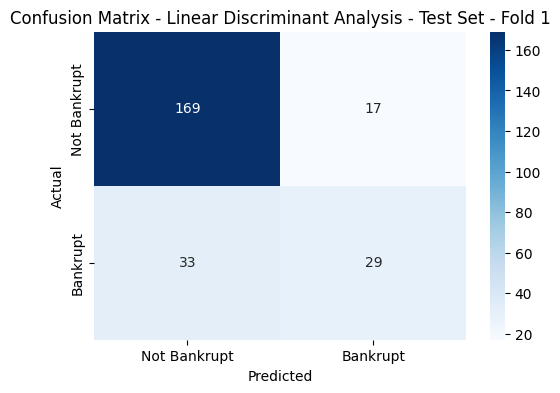

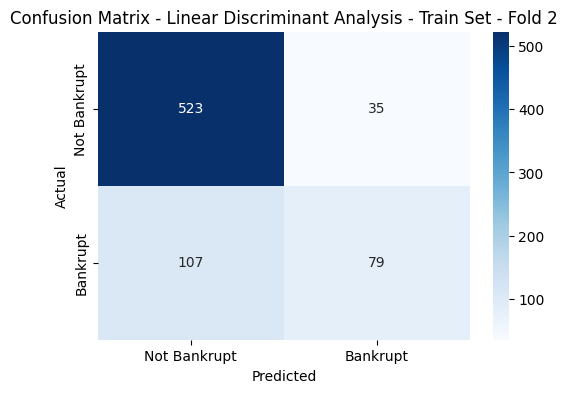

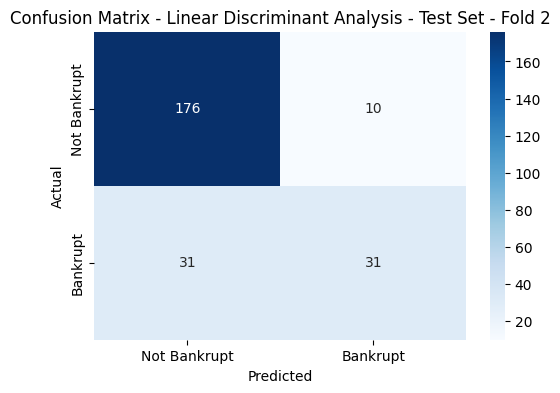

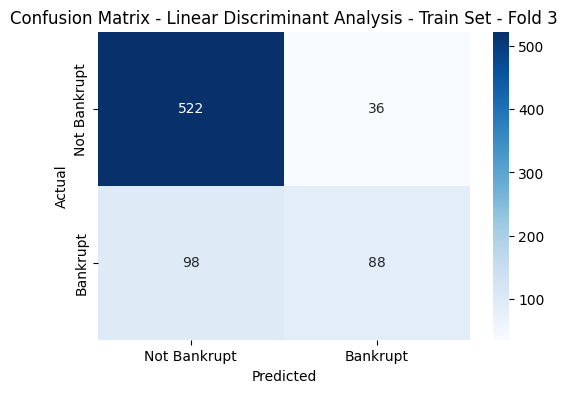

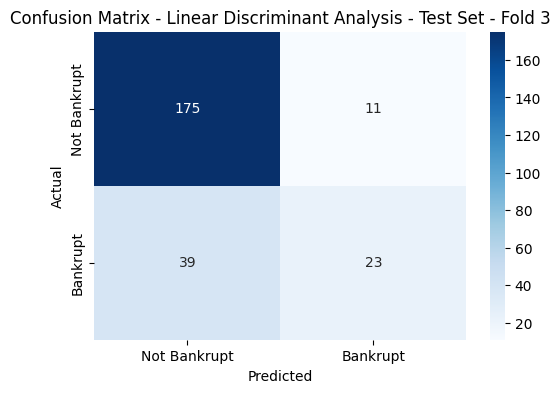

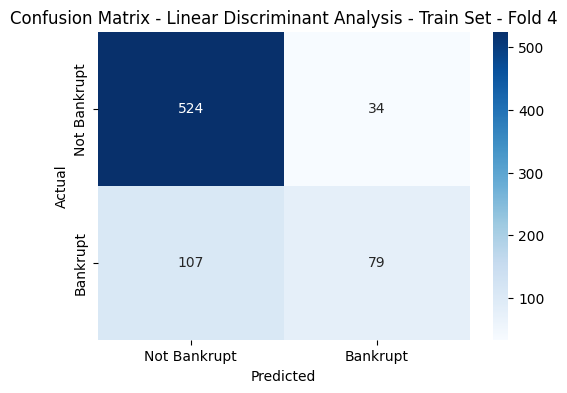

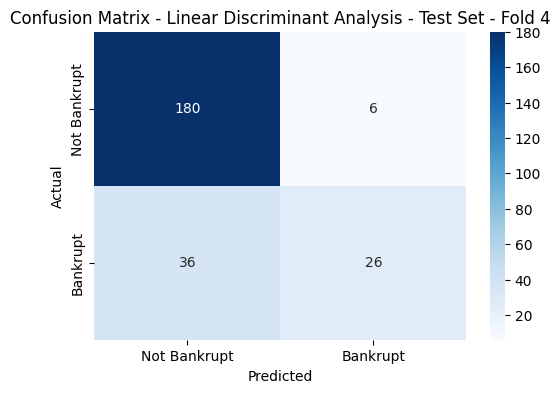

Linear Discriminant Analysis - Train Set
-------------------
Average F1 Score: 0.54
Average AUC ROC: 0.69
Average Recall: 0.43682795698924737 , Average Specifity: 0.9399641577060931


Linear Discriminant Analysis - Test Set
-------------------
Average F1 Score: 0.54
Average AUC ROC: 0.69
Average Recall: 0.4395161290322581 , Average Specifity: 0.9408602150537635





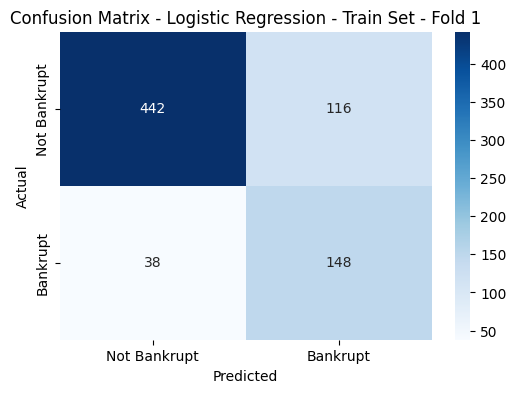

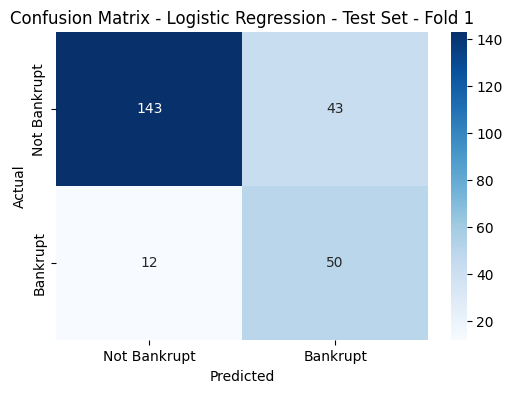

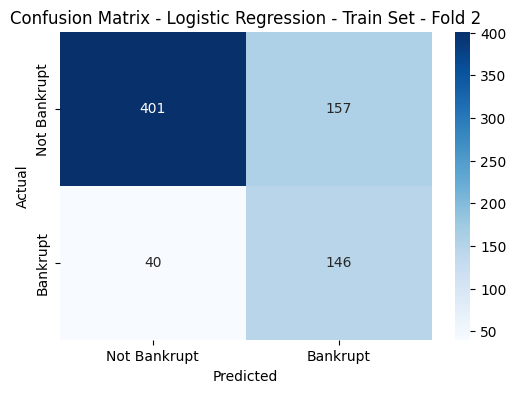

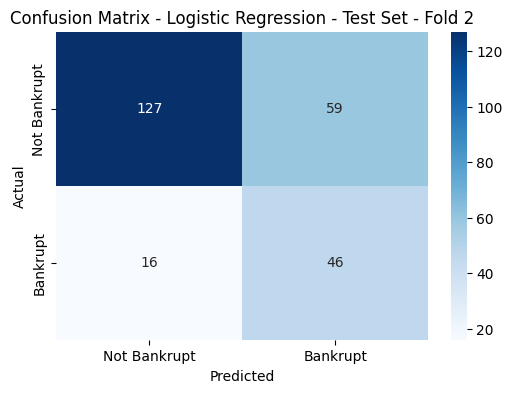

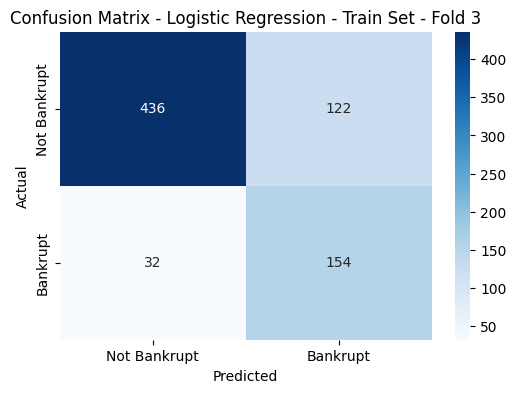

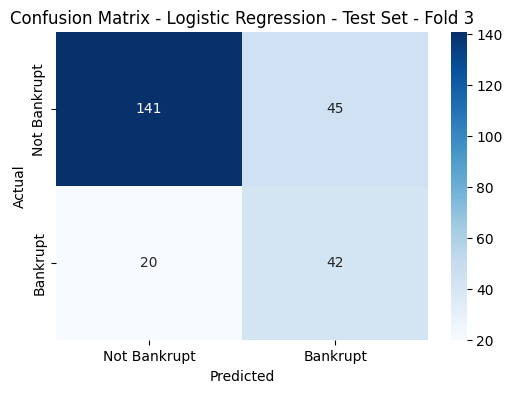

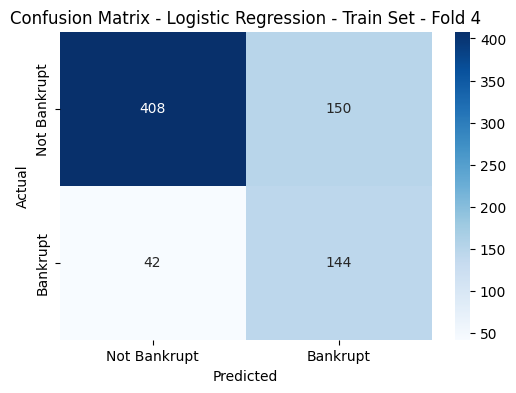

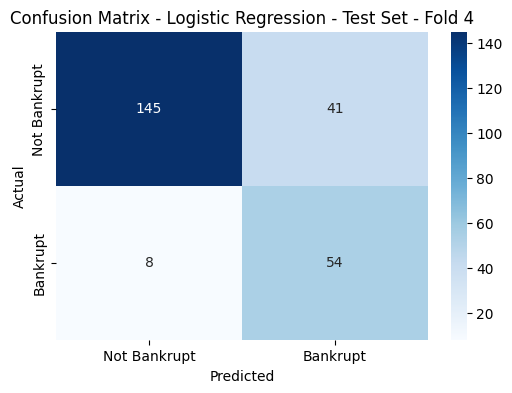

Logistic Regression - Train Set
-------------------
Average F1 Score: 0.63
Average AUC ROC: 0.78
Average Recall: 0.7956989247311828 , Average Specifity: 0.7558243727598566


Logistic Regression - Test Set
-------------------
Average F1 Score: 0.61
Average AUC ROC: 0.76
Average Recall: 0.7741935483870968 , Average Specifity: 0.7473118279569892





/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


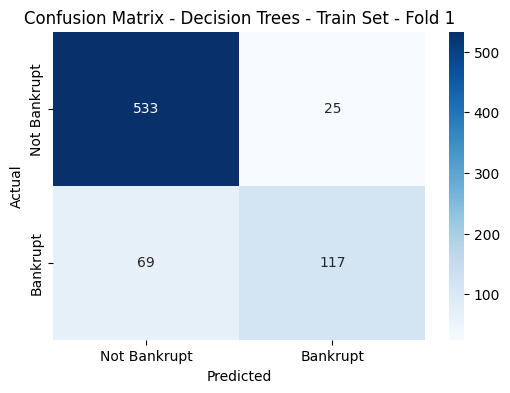

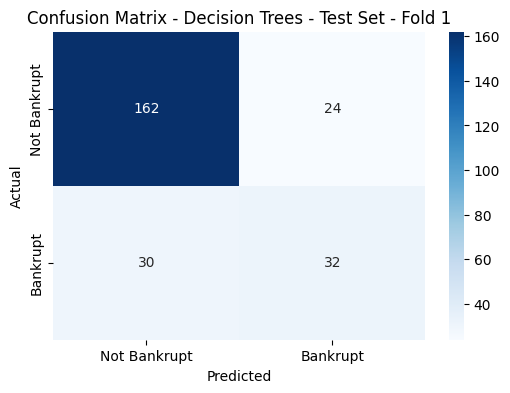

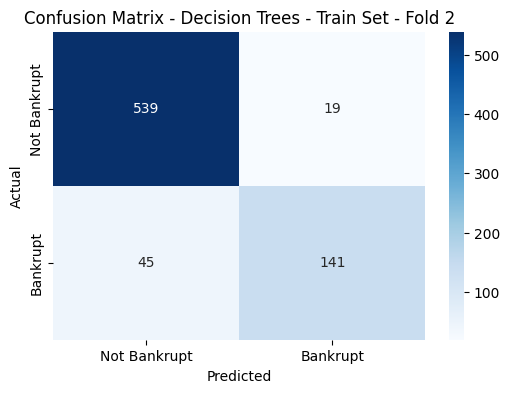

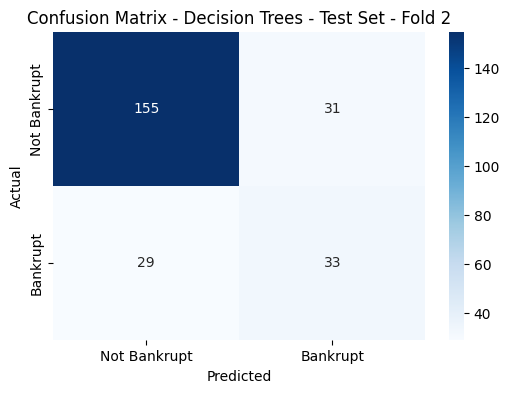

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


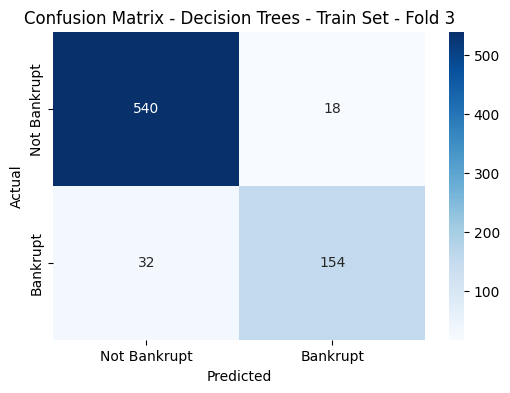

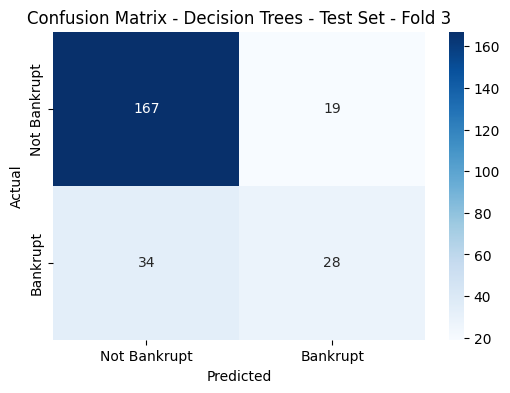

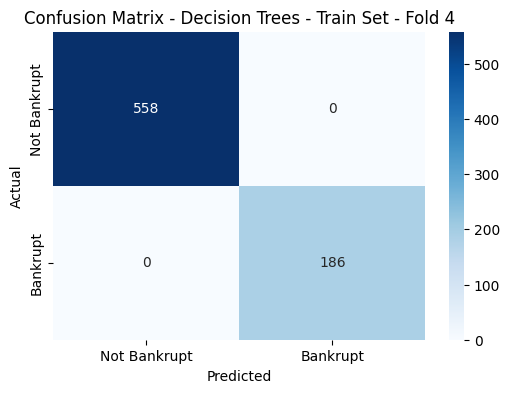

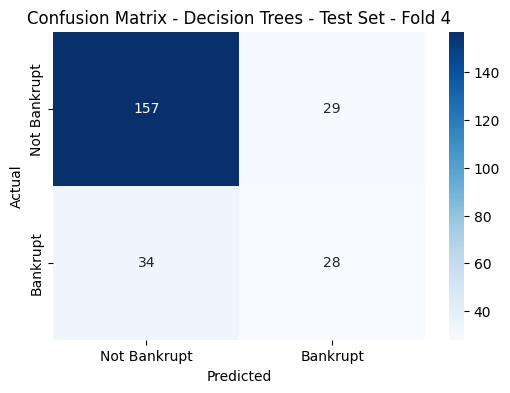

Decision Trees - Train Set
-------------------
Average F1 Score: 0.85
Average AUC ROC: 0.89
Average Recall: 0.8037634408602151 , Average Specifity: 0.9722222222222222


Decision Trees - Test Set
-------------------
Average F1 Score: 0.51
Average AUC ROC: 0.67
Average Recall: 0.4879032258064516 , Average Specifity: 0.8615591397849462





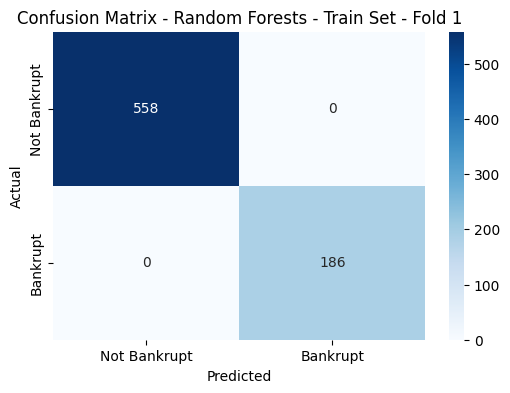

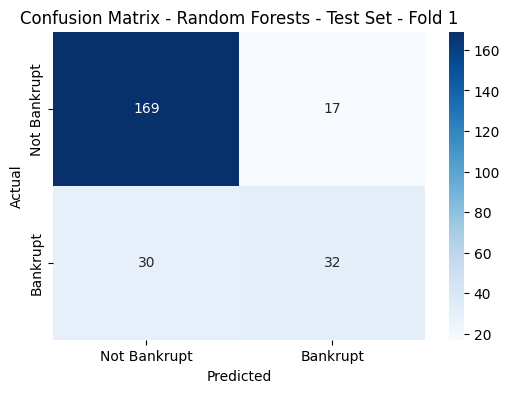

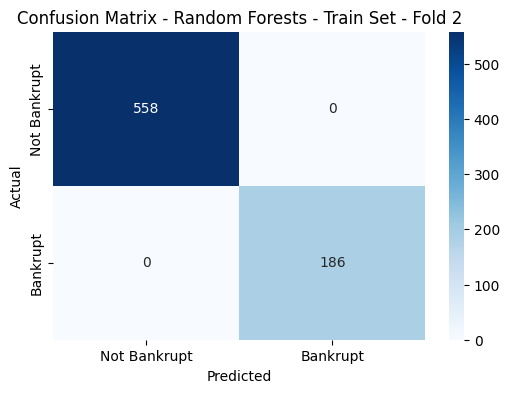

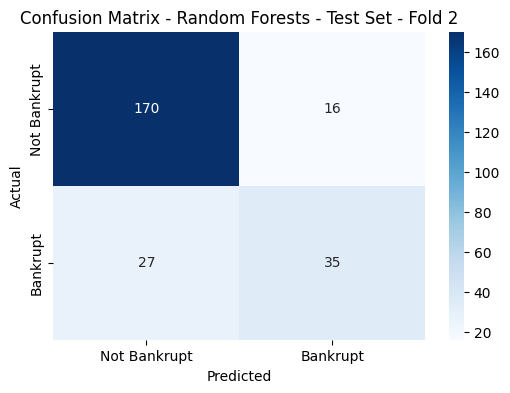

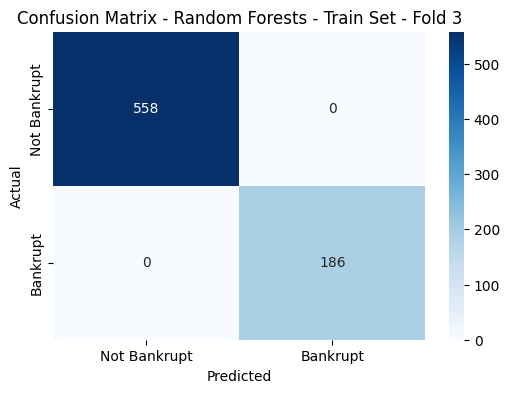

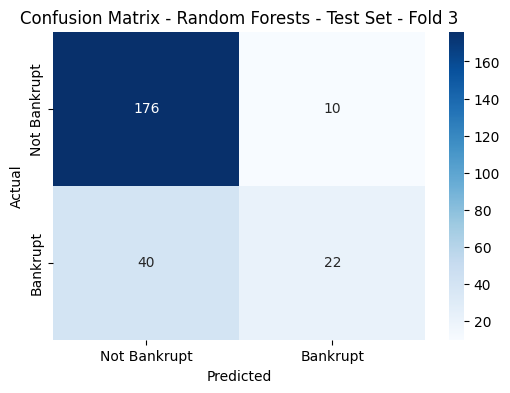

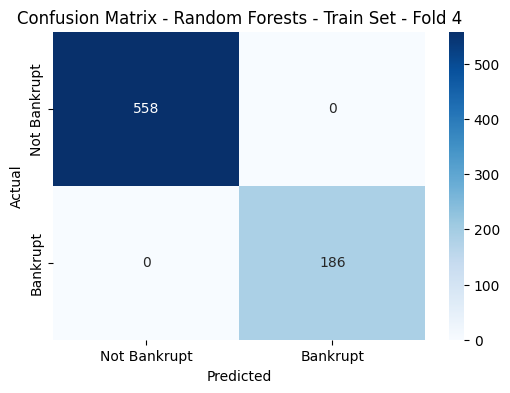

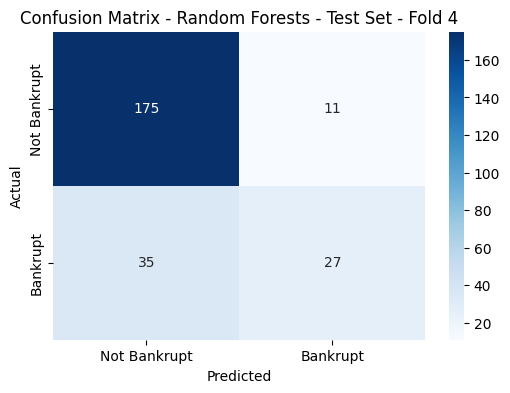

Random Forests - Train Set
-------------------
Average F1 Score: 1.0
Average AUC ROC: 1.0
Average Recall: 1.0 , Average Specifity: 1.0


Random Forests - Test Set
-------------------
Average F1 Score: 0.55
Average AUC ROC: 0.7
Average Recall: 0.467741935483871 , Average Specifity: 0.9274193548387096





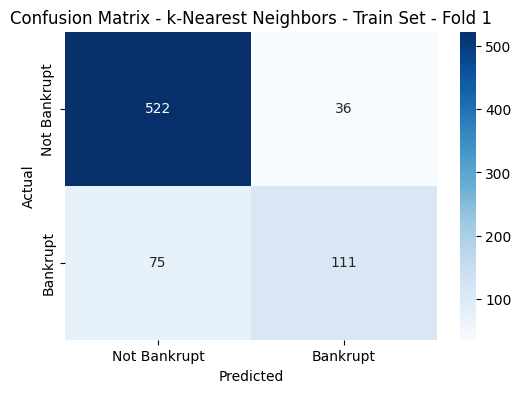

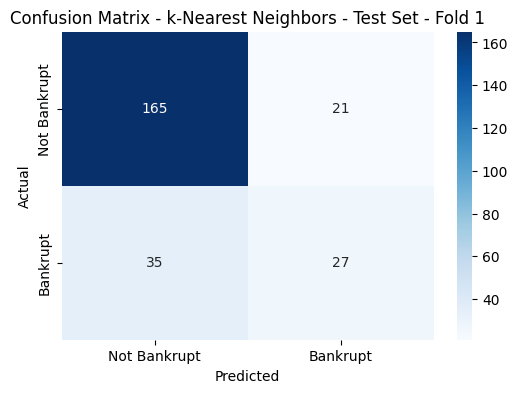

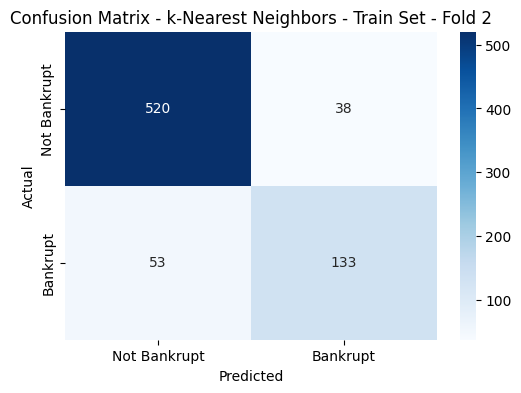

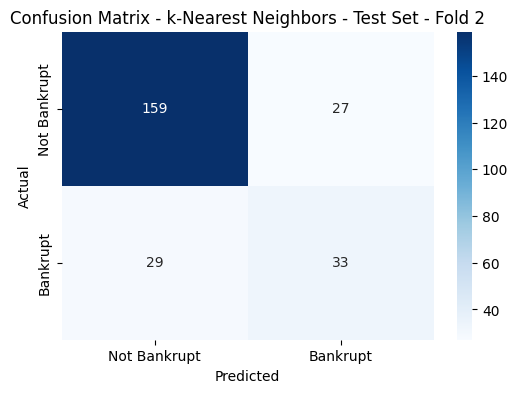

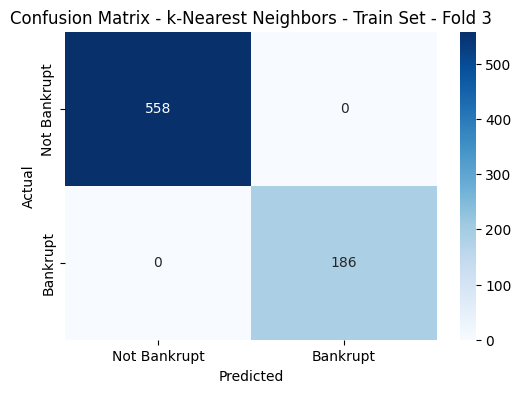

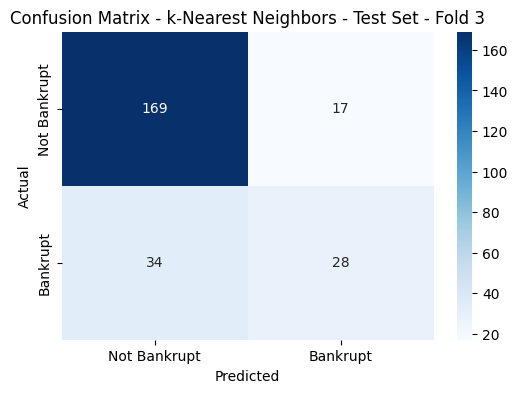

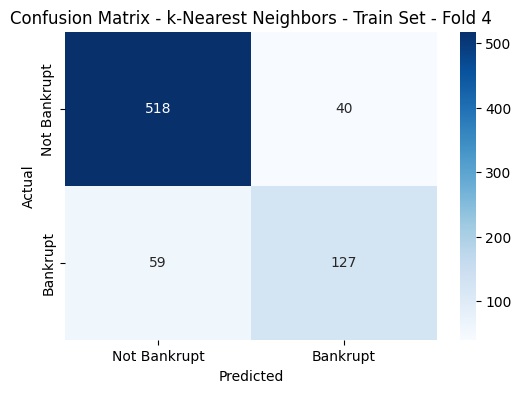

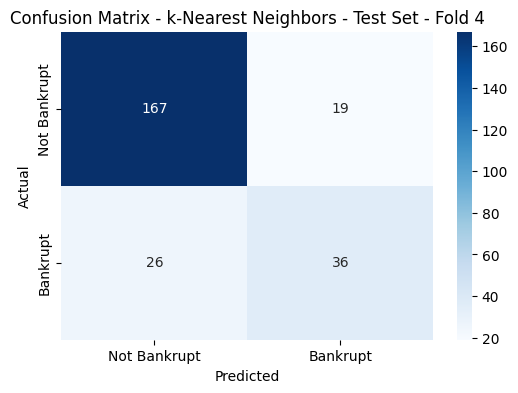

k-Nearest Neighbors - Train Set
-------------------
Average F1 Score: 0.78
Average AUC ROC: 0.85
Average Recall: 0.7486559139784946 , Average Specifity: 0.9489247311827957


k-Nearest Neighbors - Test Set
-------------------
Average F1 Score: 0.54
Average AUC ROC: 0.69
Average Recall: 0.5 , Average Specifity: 0.8870967741935484





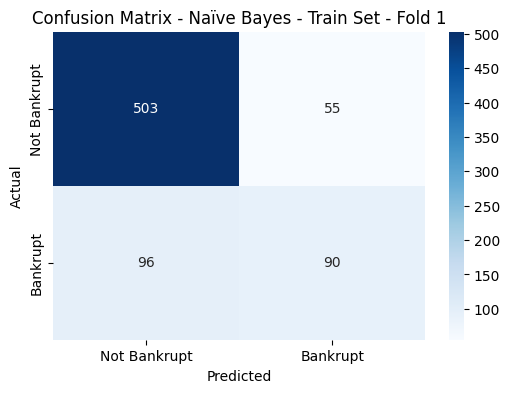

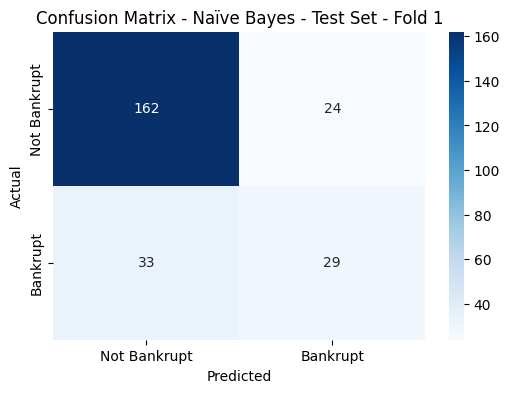

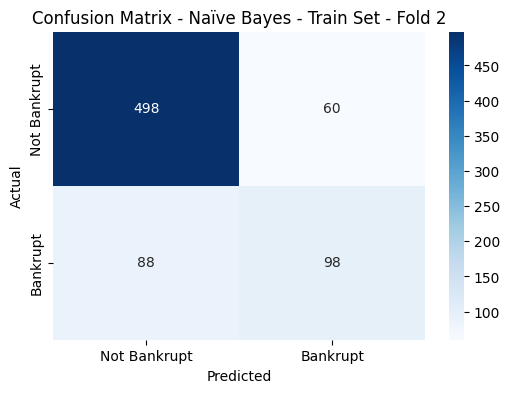

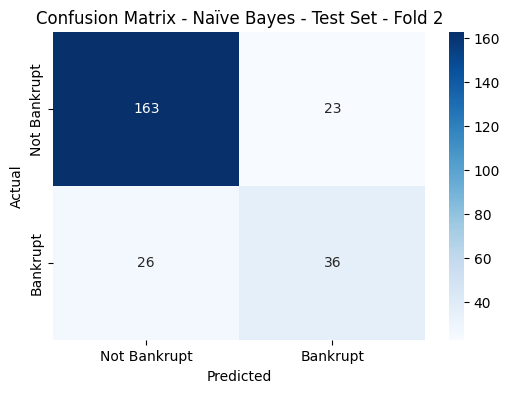

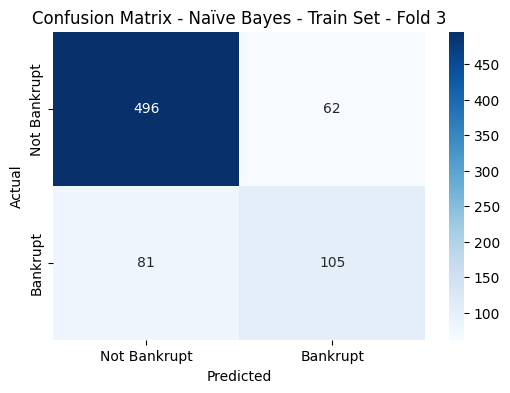

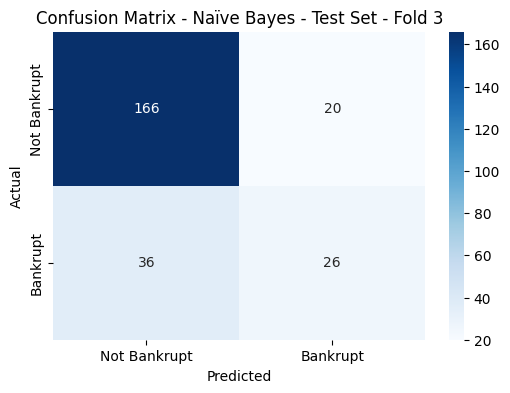

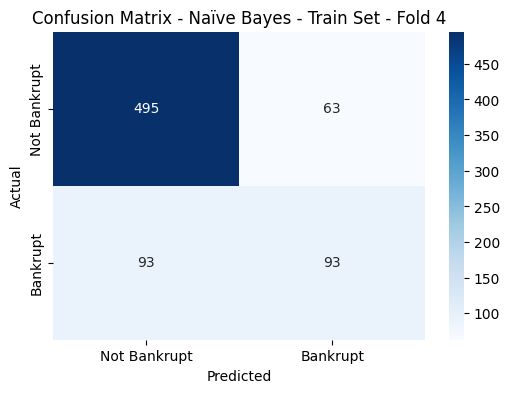

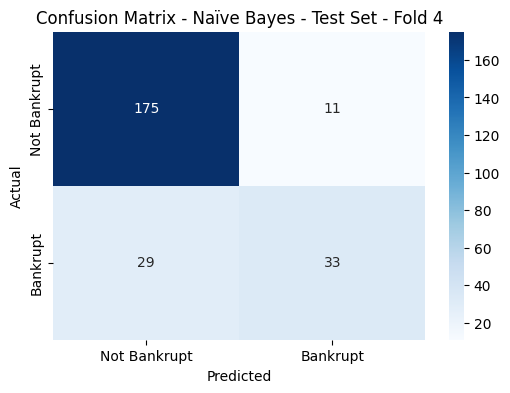

Naïve Bayes - Train Set
-------------------
Average F1 Score: 0.56
Average AUC ROC: 0.71
Average Recall: 0.5188172043010753 , Average Specifity: 0.8924731182795699


Naïve Bayes - Test Set
-------------------
Average F1 Score: 0.55
Average AUC ROC: 0.7
Average Recall: 0.5 , Average Specifity: 0.8951612903225806





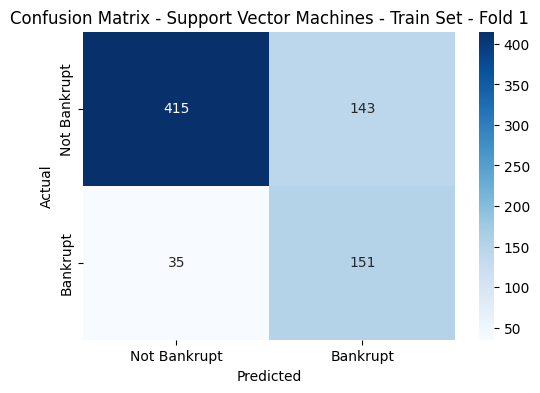

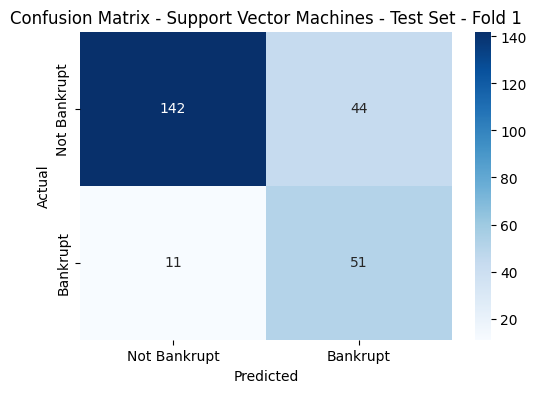

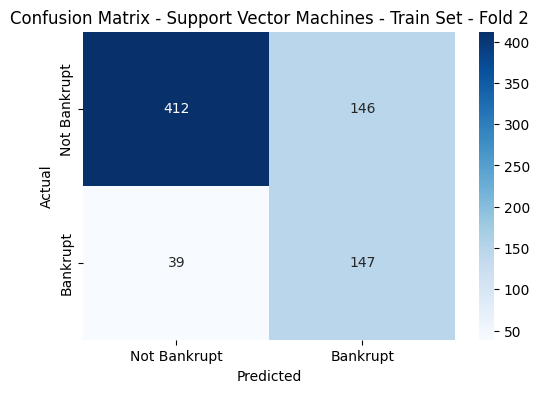

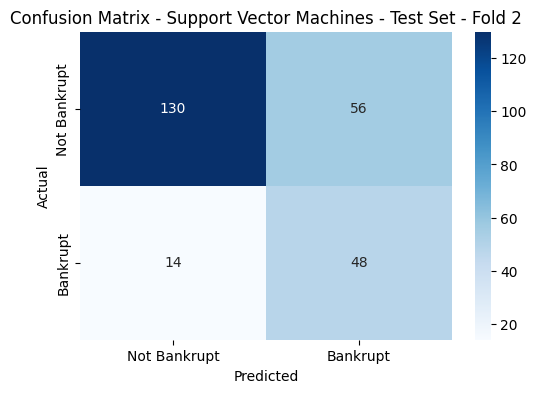

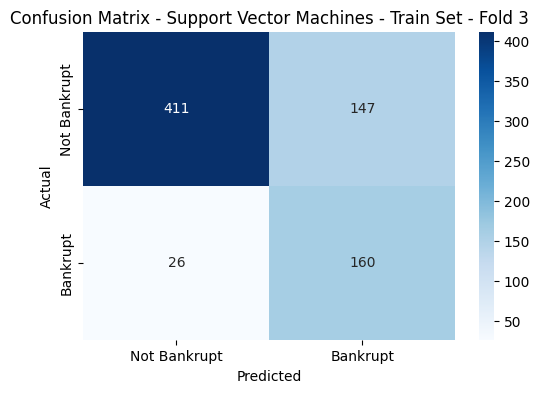

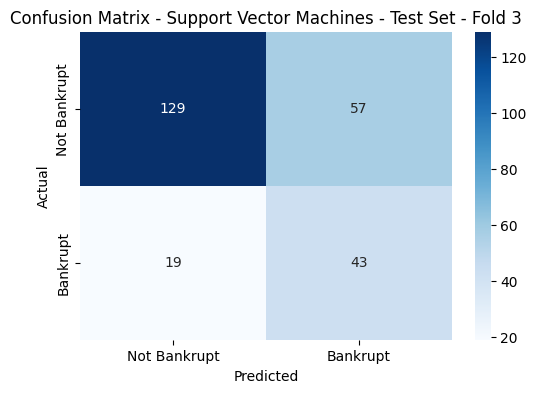

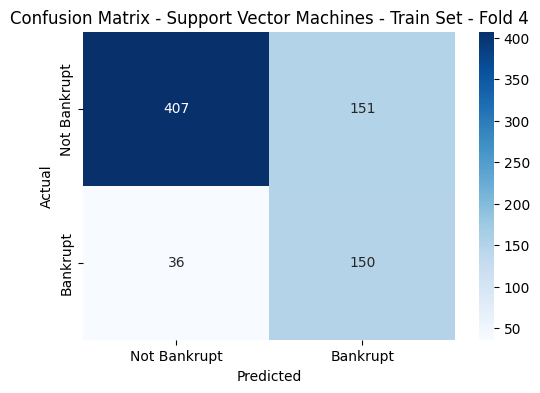

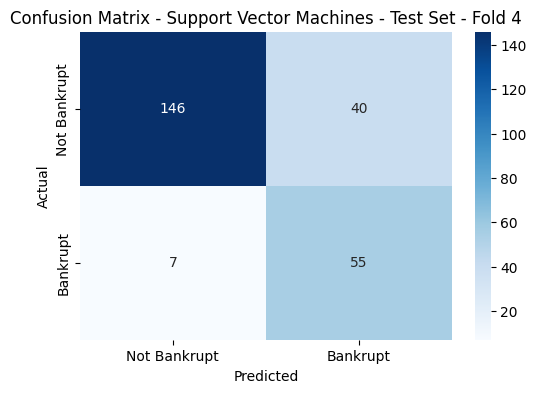

Support Vector Machines - Train Set
-------------------
Average F1 Score: 0.63
Average AUC ROC: 0.78
Average Recall: 0.8172043010752688 , Average Specifity: 0.7370071684587813


Support Vector Machines - Test Set
-------------------
Average F1 Score: 0.61
Average AUC ROC: 0.76
Average Recall: 0.7943548387096774 , Average Specifity: 0.735215053763441





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


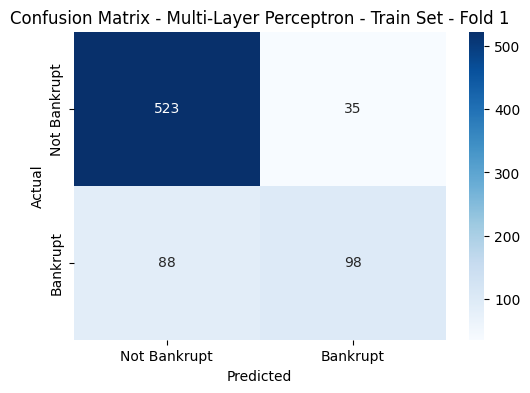

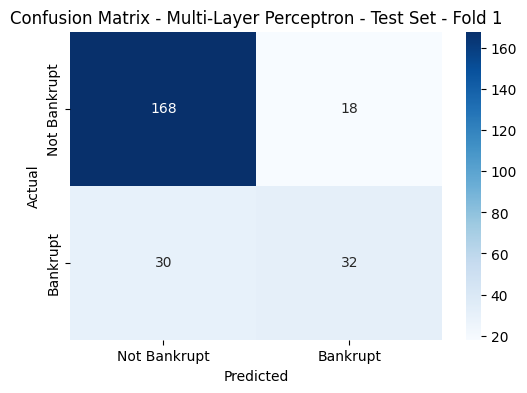

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


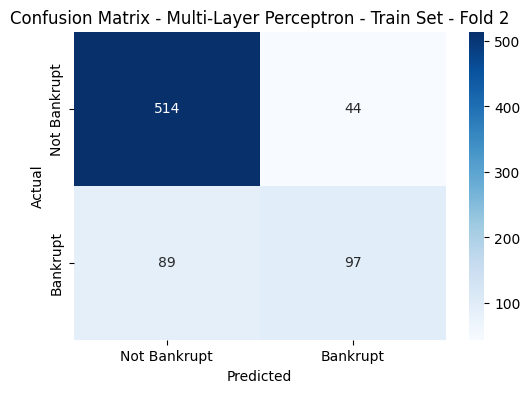

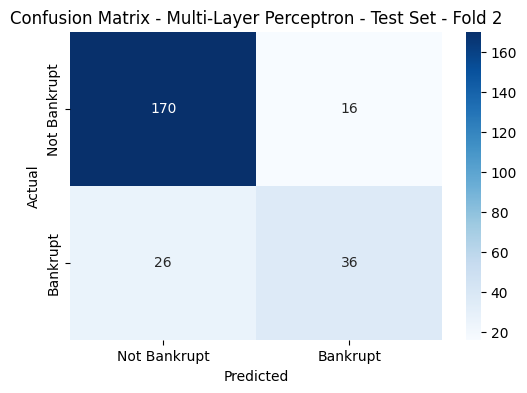

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


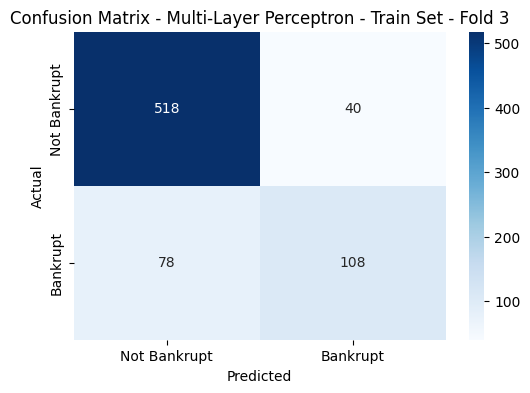

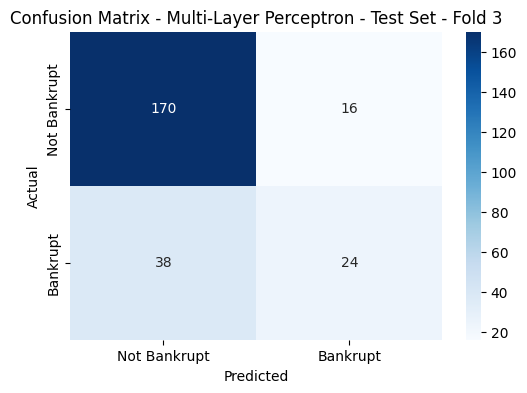

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


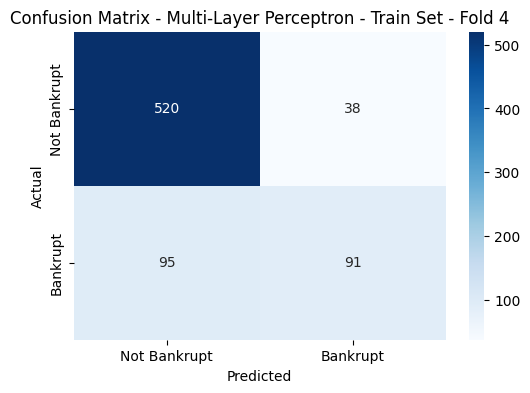

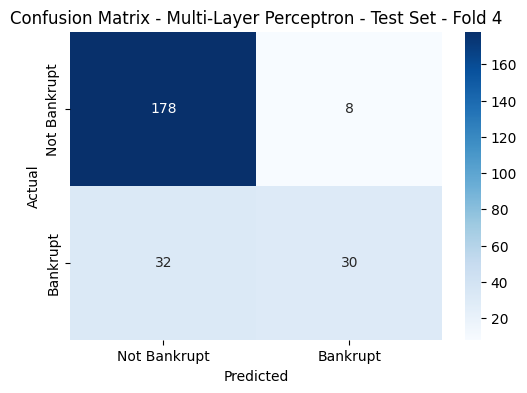

Multi-Layer Perceptron - Train Set
-------------------
Average F1 Score: 0.61
Average AUC ROC: 0.73
Average Recall: 0.5295698924731183 , Average Specifity: 0.9296594982078853


Multi-Layer Perceptron - Test Set
-------------------
Average F1 Score: 0.57
Average AUC ROC: 0.71
Average Recall: 0.49193548387096775 , Average Specifity: 0.9220430107526881





In [20]:
results_balanced, valid_models_balanced = train_and_evaluate(models, X, y, stratified_kfold)

In [30]:
if valid_models_balanced:
  print("\nValid Models that meet the criteria:\n")
  for model in valid_models_balanced:
      print(f"Model: {model[1]}, Average Recall: {model[2]:.2f}, Average Specificity: {model[3]:.2f}")
      print(f"Best Parameters: {model[0].best_params_}\n")
else:
  print("There is no model meeting the requirements")


Valid Models that meet the criteria:

Model: Logistic Regression, Average Recall: 0.77, Average Specificity: 0.75
Best Parameters: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__solver': 'newton-cg'}

Model: Support Vector Machines, Average Recall: 0.79, Average Specificity: 0.74
Best Parameters: {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}



## Save Balanced Dataset Results

In [22]:
results_balanced_df = pd.DataFrame(results_balanced)

# Save DataFrame to a CSV file
results_balanced_df.to_csv('balancedDataOutcomes.csv', index=False)
print(results_balanced_df)

                 Classifier Name  Fold: Training or Test Set  \
0   Linear Discriminant Analysis      1                Train   
1   Linear Discriminant Analysis      1                 Test   
2   Linear Discriminant Analysis      2                Train   
3   Linear Discriminant Analysis      2                 Test   
4   Linear Discriminant Analysis      3                Train   
..                           ...    ...                  ...   
59        Multi-Layer Perceptron      2                 Test   
60        Multi-Layer Perceptron      3                Train   
61        Multi-Layer Perceptron      3                 Test   
62        Multi-Layer Perceptron      4                Train   
63        Multi-Layer Perceptron      4                 Test   

   Balanced or Unbalanced Train Set  Number of Training Samples  \
0                          Balanced                         744   
1                          Balanced                         248   
2                          Bal

## Combine CSVs

In [24]:
csv_imbalanced_data = pd.read_csv("/content/unbalancedDataOutcomes.csv")

# Read data from the second CSV file
csv_balanced_data = pd.read_csv("/content/balancedDataOutcomes.csv")

# Combine the data from both CSV files
combined_data = pd.concat([csv_imbalanced_data, csv_balanced_data], ignore_index=True)

# Write the combined data to a new CSV file
combined_data.to_csv("dataOutcomesCombined.csv", index=False)